TASK 1: EXPLORATORY DATA ANALYSIS

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [3]:
data = pd.read_csv('COMP 1886 - Coursework dataset.csv')

In [4]:
data.describe()

17-Jan        17-Feb        17-Mar        17-Apr        17-May  \
count    243.000000    242.000000    243.000000    242.000000    241.000000   
mean    3602.798354   2998.161157   3721.646091   3322.500000   3602.593361   
std     5116.986073   4050.109781   4913.648323   4330.203757   4632.923305   
min        5.000000      5.000000     10.000000     10.000000     10.000000   
25%      830.000000    791.250000   1072.500000    906.250000   1015.000000   
50%     2215.000000   1845.000000   2385.000000   2122.500000   2320.000000   
75%     4222.500000   3792.500000   4645.000000   4123.750000   4540.000000   
max    42550.000000  32765.000000  40125.000000  34730.000000  36560.000000   

             17-Jun        17-Jul        17-Aug        17-Sep        17-Oct  \
count    243.000000    243.000000    242.000000    243.000000    243.000000   
mean    3820.534979   3014.855967   3084.256198   2960.370370   3009.032922   
std     5029.753757   3894.348692   4014.044595   3834.929216   3996.884943   
min       10.000000      5.000000      5.000000      5.000000      5.000000   
25%      990.000000    830.000000    845.000000    815.000000    800.000000   
50%     2370.000000   1925.000000   1935.000000   1835.000000   1900.000000   
75%     4657.500000   3822.500000   3943.750000   3750.000000   3777.500000   
max    41000.000000  31105.000000  31625.000000  30080.000000  30105.000000   

       ...        23-Nov        23-Dec        24-Jan        24-Feb  \
count  ...    242.000000    243.000000    243.000000    243.000000   
mean   ...   2386.694215   2161.790123   2890.061728   2423.477366   
std    ...   2611.252824   2461.885697   3118.164010   2569.860261   
min    ...     10.000000      5.000000     10.000000     10.000000   
25%    ...    635.000000    587.500000    817.500000    702.500000   
50%    ...   1622.500000   1290.000000   1870.000000   1635.000000   
75%    ...   3345.000000   3107.500000   4107.500000   3520.000000   
max    ...  17255.000000  16655.000000  20460.000000  17250.000000   

             24-Mar        24-Apr        24-May        24-Jun        24-Jul  \
count    243.000000    242.000000    243.000000    243.000000    243.000000   
mean    2375.493827   2840.516529   2999.794239   2674.444444   2779.670782   
std     2421.253680   2802.025690   2888.035657   2543.547703   2618.224805   
min        5.000000     10.000000     10.000000     10.000000     10.000000   
25%      692.500000    882.500000    952.500000    880.000000    912.500000   
50%     1645.000000   2095.000000   2325.000000   2090.000000   2200.000000   
75%     3490.000000   4085.000000   4337.500000   3802.500000   3995.000000   
max    15470.000000  17130.000000  17690.000000  15570.000000  15445.000000   

             24-Aug  
count    243.000000  
mean    2525.329218  
std     2370.837347  
min        5.000000  
25%      847.500000  
50%     1930.000000  
75%     3610.000000  
max    14215.000000  

[8 rows x 88 columns]

In [5]:
data.head()

Region SOC 2 digit code  \
0  East Midlands               11   
1  East Midlands               12   
2  East Midlands               21   
3  East Midlands               22   
4  East Midlands               23   

                                   SOC 2 digit label  \
0                   Corporate managers and directors   
1                     Other managers and proprietors   
2  Science, research, engineering and technology ...   
3                               Health professionals   
4       Teaching and other educational professionals   

  Prioritise using SOC 2 as high or low  17-Jan  17-Feb  17-Mar  17-Apr  \
0                                  high    2315  1955.0    2380  1950.0   
1                                   low    1420  1240.0    1465  1250.0   
2                                   low    5010  4165.0    5170  4775.0   
3                                  high    2565  2020.0    2670  2515.0   
4                                   low    2075  1850.0    2160  1670.0   

   17-May  17-Jun  ...  23-Nov  23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  \
0  2210.0    2080  ...  1500.0    1400    1850    1525    1540  1785.0   
1  1475.0    1555  ...  1020.0     915    1295    1105    1050  1350.0   
2  5130.0    4580  ...  2445.0    2395    3045    2575    2510  2620.0   
3  2890.0    2655  ...  3300.0    2915    3380    2770    2845  3200.0   
4  1940.0    2200  ...  1700.0    1825    2135    2035    2270  2400.0   

   24-May  24-Jun  24-Jul  24-Aug  
0    1870    1610    1830    1565  
1    1440    1330    1275    1295  
2    2635    2270    2315    2270  
3    3260    2895    2965    2635  
4    2805    2225    1945    1560  

[5 rows x 96 columns]

In [6]:
data.tail()

Region SOC 2 digit code  \
238  Yorkshire and The Humber               81   
239  Yorkshire and The Humber               82   
240  Yorkshire and The Humber               91   
241  Yorkshire and The Humber               92   
242  Yorkshire and The Humber          Unknown   

                                     SOC 2 digit label  \
238              Process, plant and machine operatives   
239  Transport and mobile machine drivers and opera...   
240          Elementary trades and related occupations   
241  Elementary administration and service occupations   
242                                            Unknown   

    Prioritise using SOC 2 as high or low  17-Jan  17-Feb  17-Mar  17-Apr  \
238                                   low    1635  1600.0    2190  1985.0   
239                                  high    1435  1280.0    1735  1685.0   
240                                   low     490   590.0     845   660.0   
241                                  high    2610  2960.0    3825  3680.0   
242                                  high      85    65.0      85    45.0   

     17-May  17-Jun  ...  23-Nov  23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  \
238  2125.0    2175  ...  1385.0    1280    1885    1570    1620  2160.0   
239  1870.0    2290  ...  1190.0     845    1265    1200    1145  1850.0   
240   855.0     845  ...   375.0     340     555     425     465   740.0   
241  3945.0    5215  ...  2840.0    2550    3955    3590    4005  4935.0   
242    70.0      55  ...    35.0      35      45      35      30    15.0   

     24-May  24-Jun  24-Jul  24-Aug  
238    2180    2120    2295    2255  
239    2345    2385    2575    2480  
240     855     775     910     875  
241    4985    4600    4910    4875  
242      35      25      40      25  

[5 rows x 96 columns]

In [7]:
data.shape

(243, 96)

In [8]:
numeric_features = data.select_dtypes(include=[np.number])

numeric_features.columns
#although it is numeric, the datatype is object which means that there are some strings mixed with numeric data. 

Index(['17-Jan', '17-Feb', '17-Mar', '17-Apr', '17-May', '17-Jun', '17-Jul',
       '17-Aug', '17-Sep', '17-Oct', '17-Nov', '18-Jan', '18-Feb', '18-Mar',
       '18-Apr', '18-May', '18-Jun', '18-Jul', '18-Aug', '18-Sep', '18-Oct',
       '18-Nov', '18-Dec', '19-Jan', '19-Feb', '19-Mar', '19-Apr', '19-May',
       '19-Jun', '19-Jul', '19-Aug', '19-Sep', '19-Oct', '19-Nov', '19-Dec',
       '20-Jan', '20-Feb', '20-Mar', '20-Jul', '20-Aug', '20-Sep', '20-Oct',
       '20-Nov', '20-Dec', '21-Jan', '21-Feb', '21-Mar', '21-Apr', '21-May',
       '21-Jun', '21-Jul', '21-Aug', '21-Sep', '21-Oct', '21-Nov', '21-Dec',
       '22-Jan', '22-Feb', '22-Mar', '22-Apr', '22-May', '22-Jun', '22-Jul',
       '22-Aug', '22-Sep', '22-Oct', '22-Nov', '22-Dec', '23-Jan', '23-Feb',
       '23-Mar', '23-Apr', '23-May', '23-Jun', '23-Jul', '23-Aug', '23-Sep',
       '23-Oct', '23-Nov', '23-Dec', '24-Jan', '24-Feb', '24-Mar', '24-Apr',
       '24-May', '24-Jun', '24-Jul', '24-Aug'],
      dtype='object')

In [9]:
type(numeric_features)

pandas.core.frame.DataFrame

In [10]:
categorical_features = data.select_dtypes(include=[object])

categorical_features.columns
#already the 4 columns which are numerical but have strings are showing themselves 

Index(['Region', 'SOC 2 digit code', 'SOC 2 digit label',
       'Prioritise using SOC 2 as high or low', '17-Dec', '20-Apr', '20-May',
       '20-Jun'],
      dtype='object')

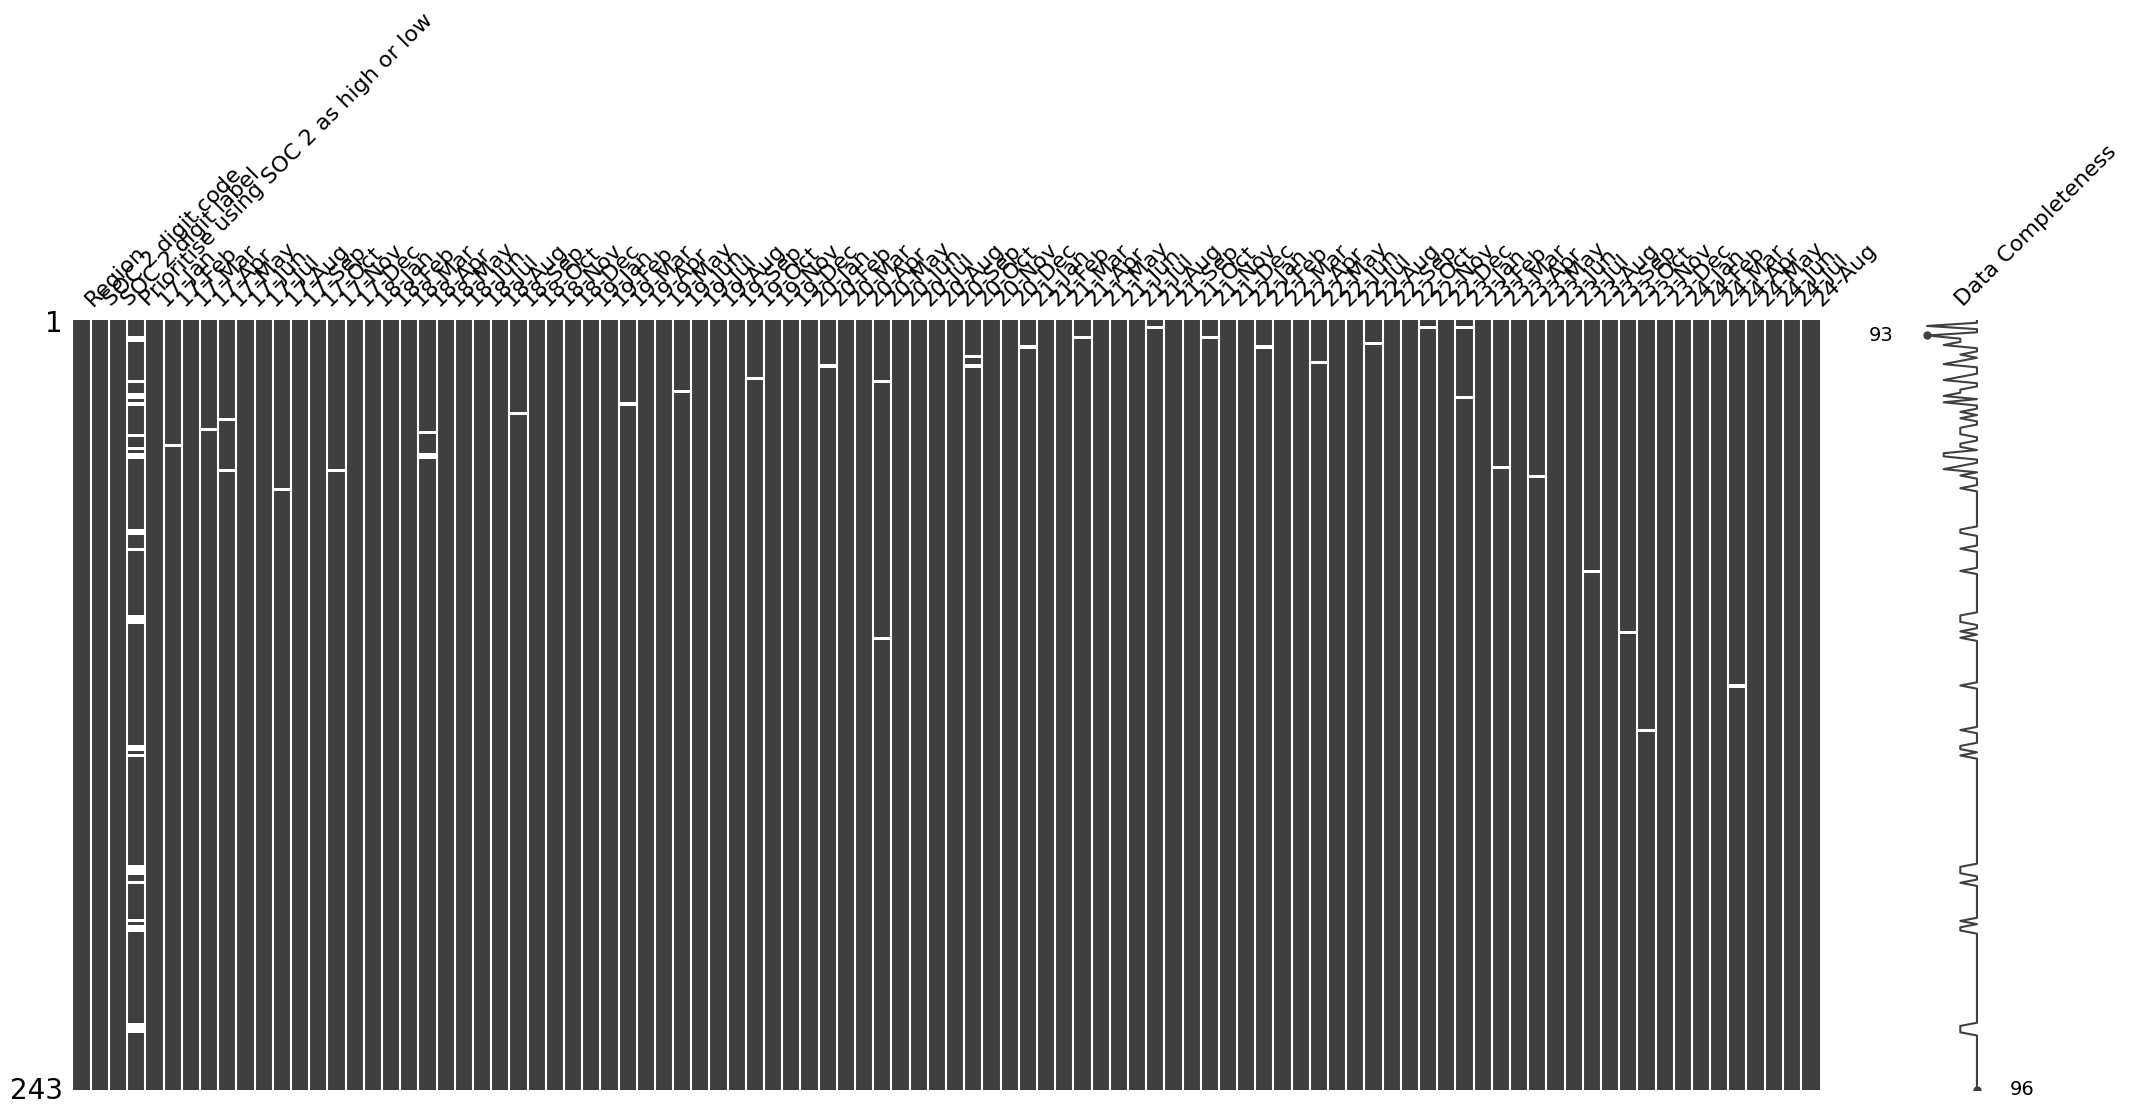

In [11]:
msno.matrix(data,labels=True)
plt.savefig('missing_data_matrix.png', format='png')

<Axes: >

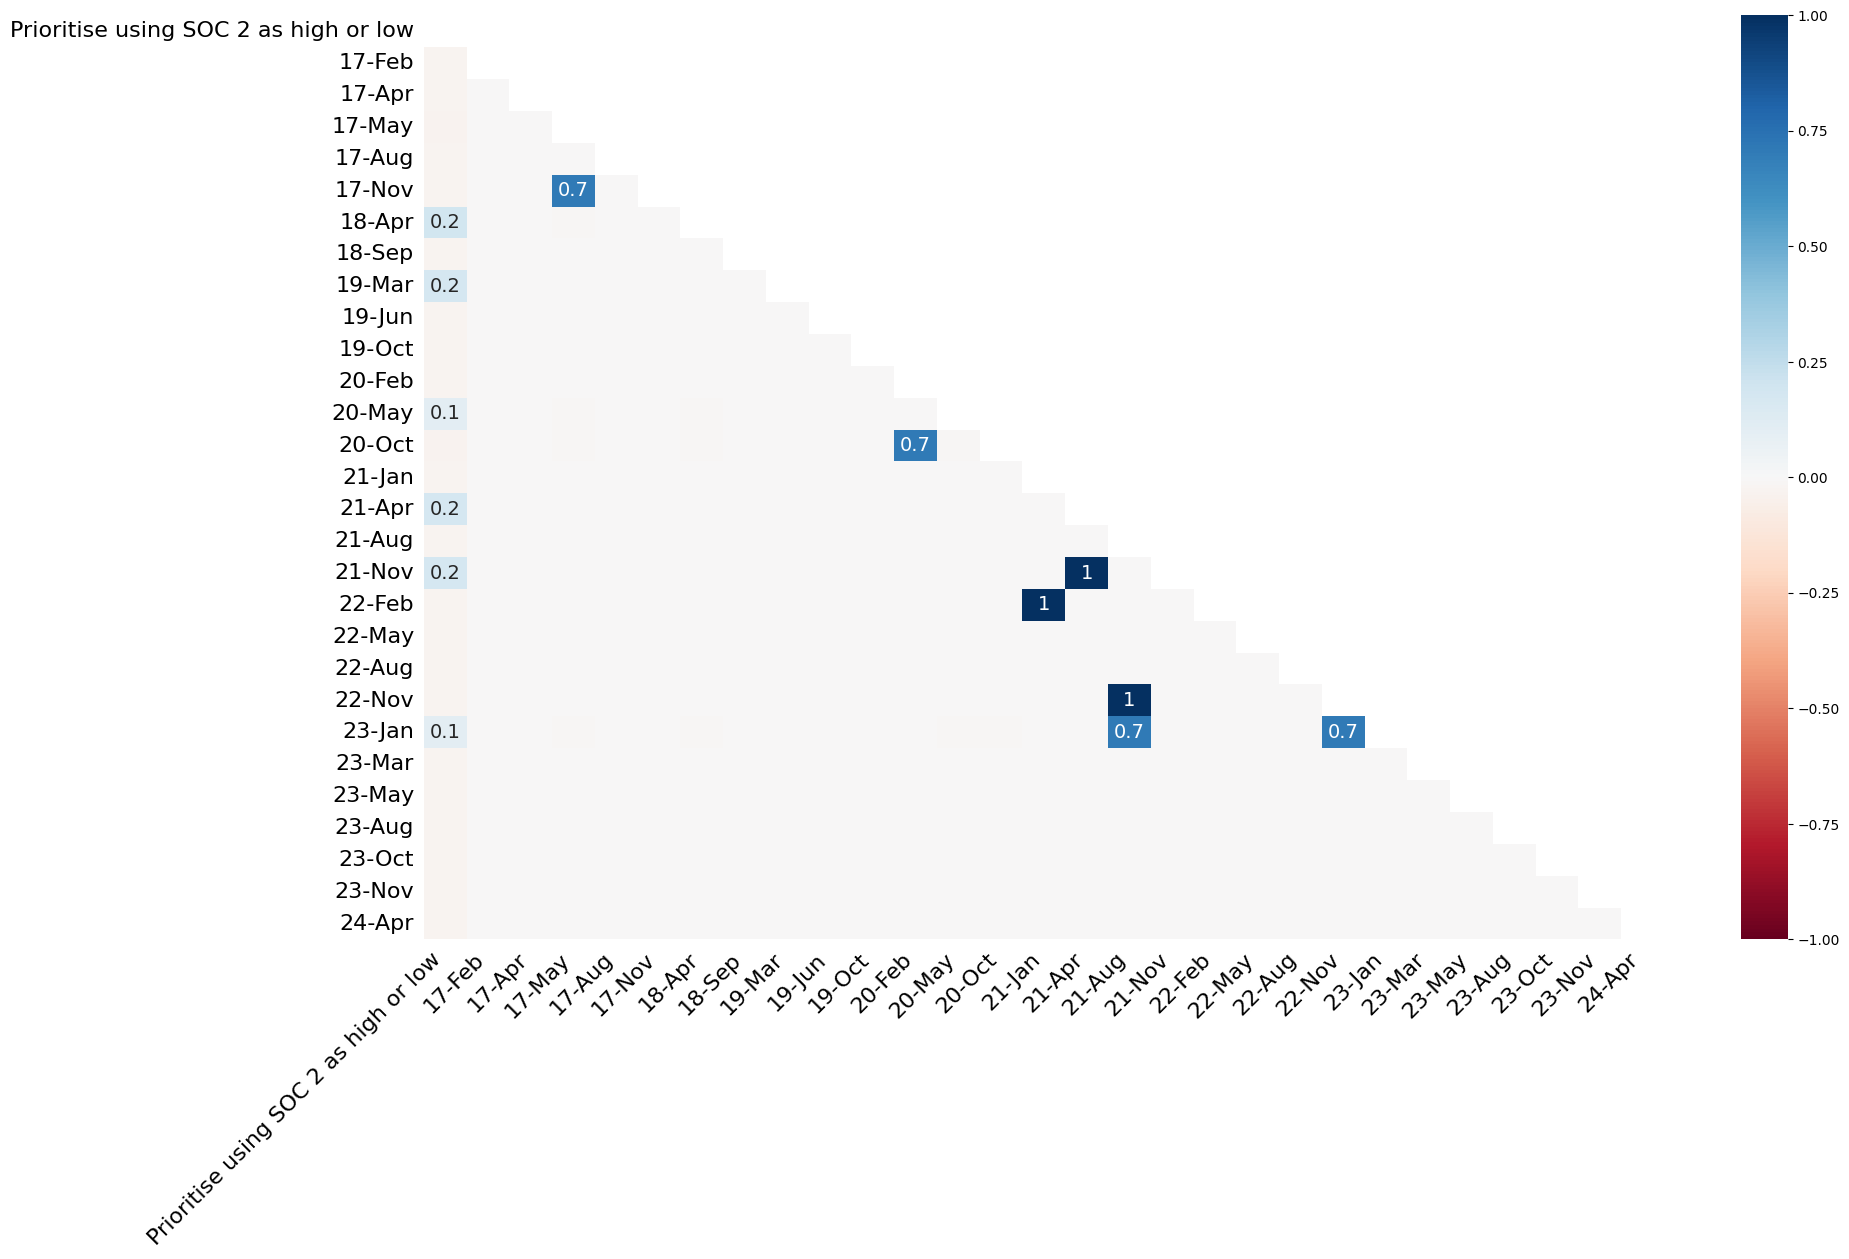

In [12]:
msno.heatmap(data)

<Axes: >

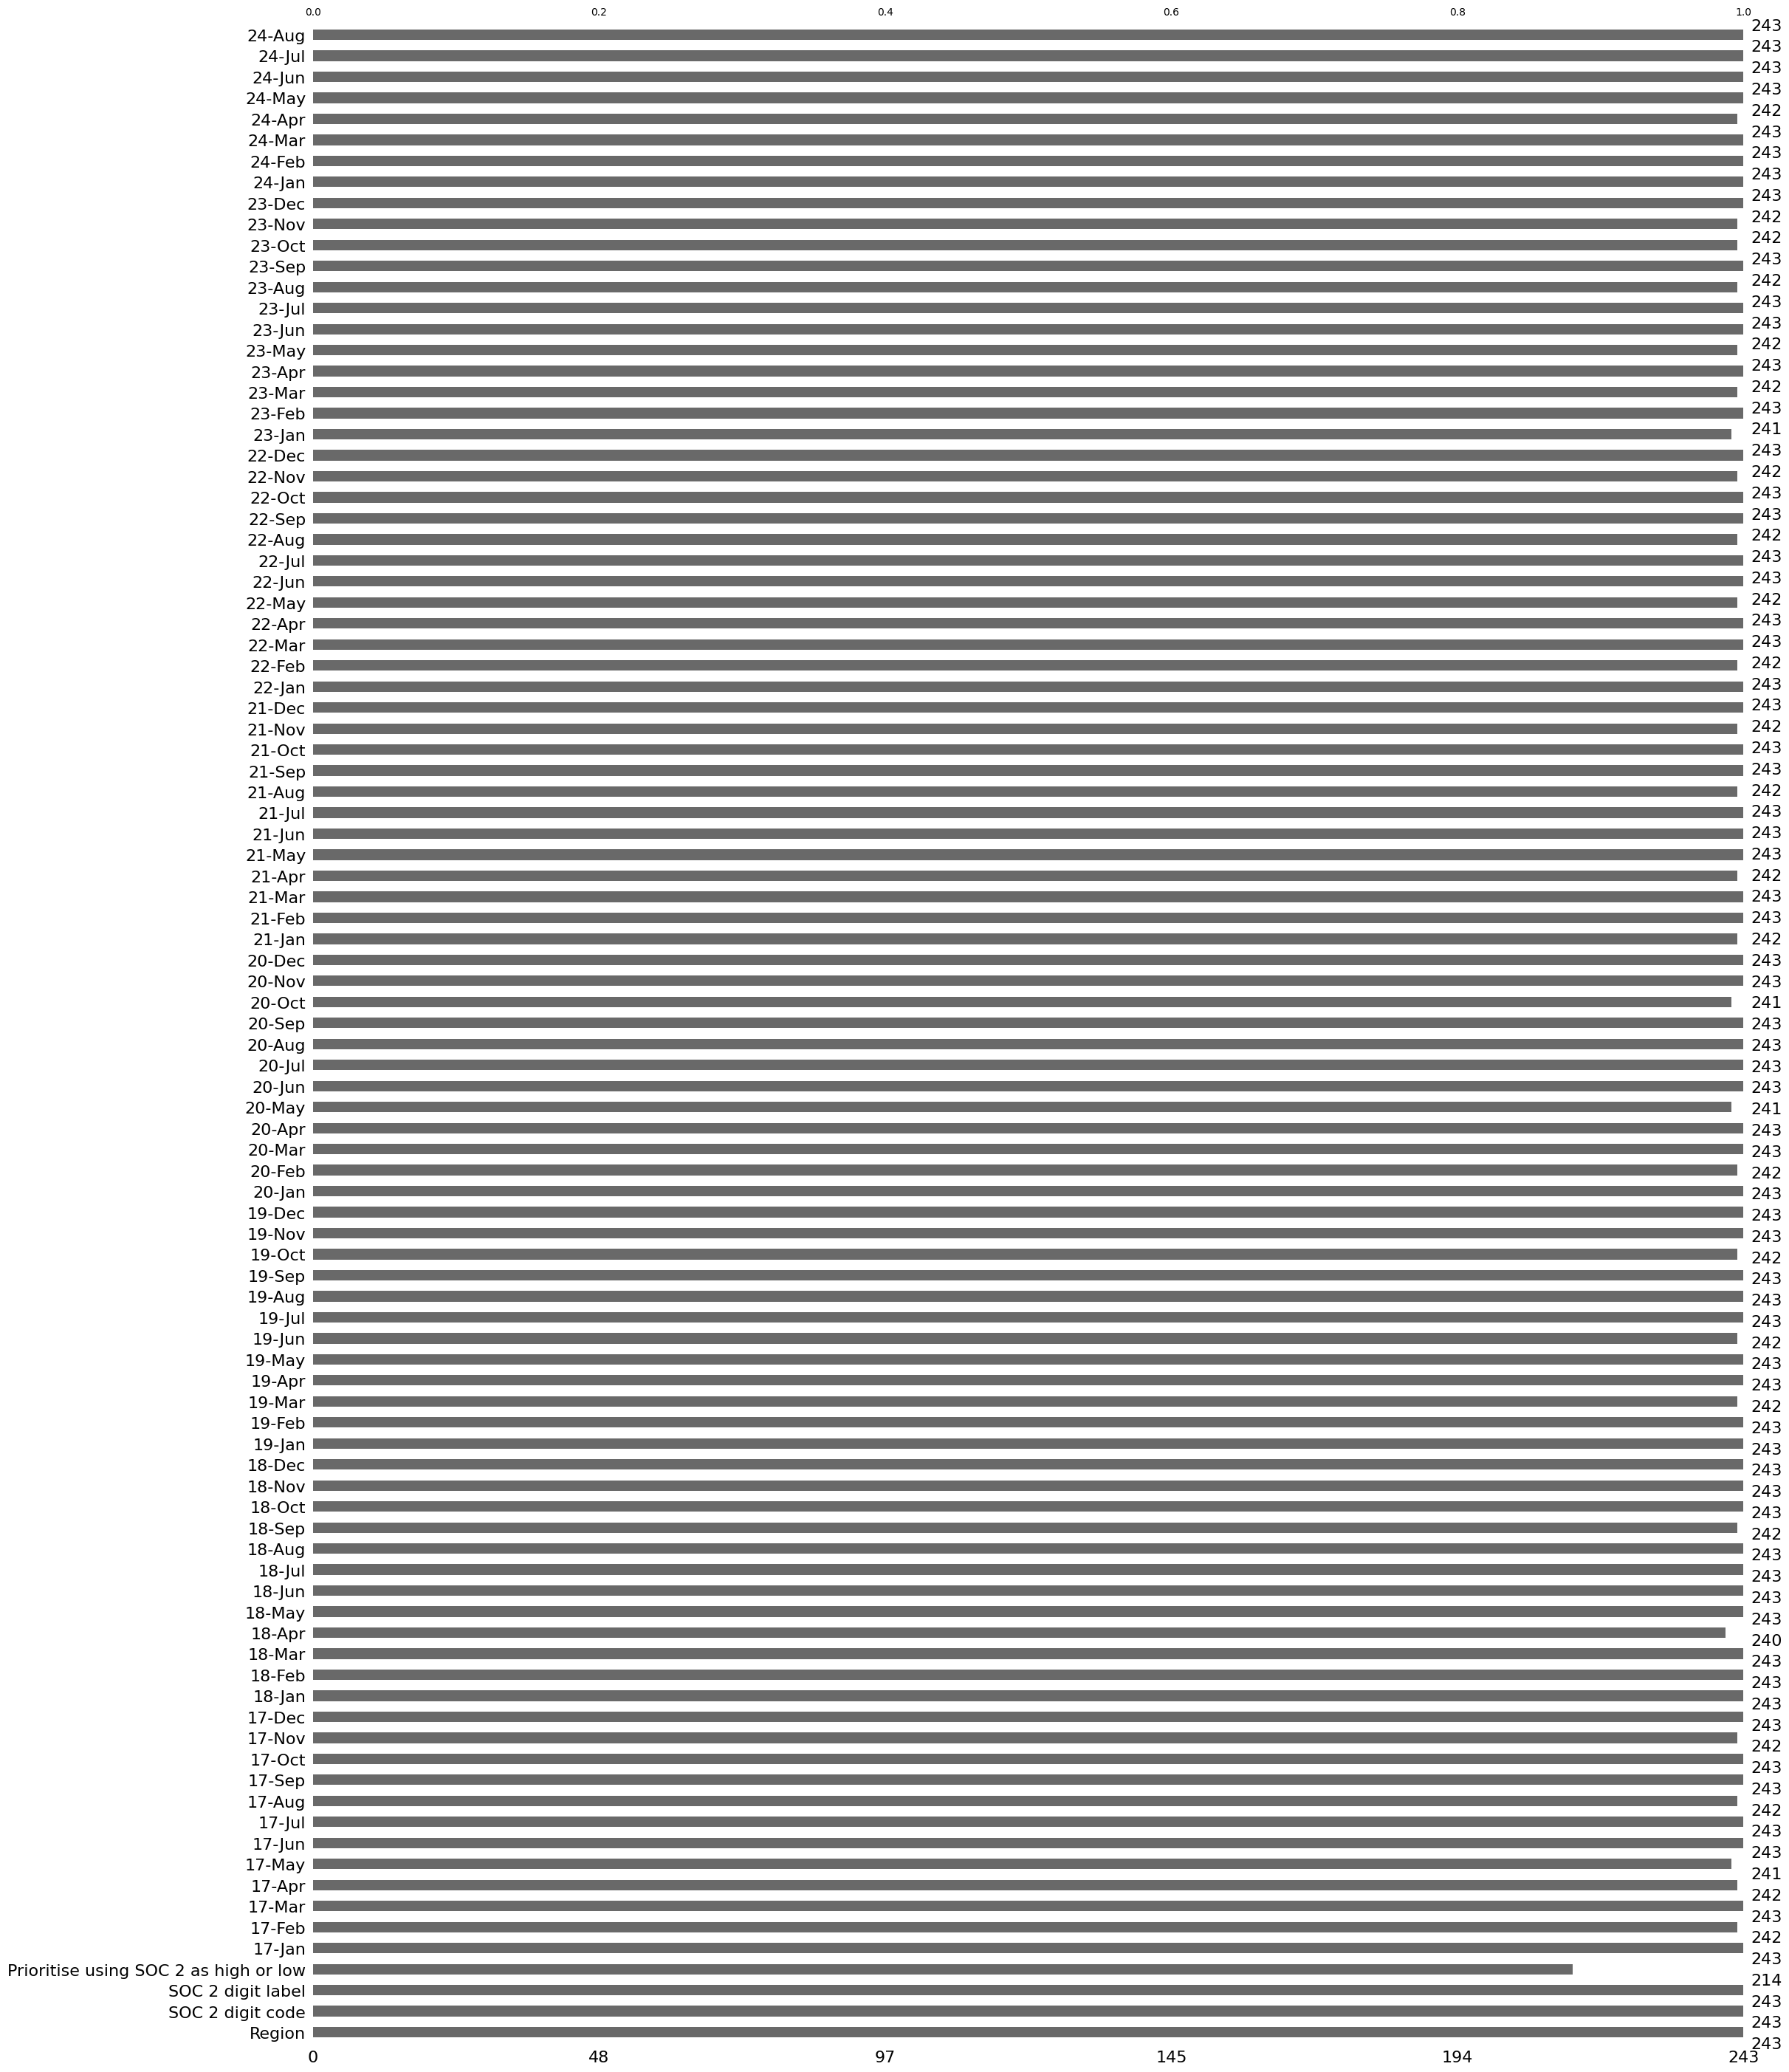

In [13]:
msno.bar(data.sample(243))

In [14]:
print(numeric_features.corr())

          17-Jan    17-Feb    17-Mar    17-Apr    17-May    17-Jun    17-Jul  \
17-Jan  1.000000  0.996856  0.994637  0.992206  0.990051  0.984449  0.982328   
17-Feb  0.996856  1.000000  0.997807  0.996578  0.995337  0.992016  0.988955   
17-Mar  0.994637  0.997807  1.000000  0.997723  0.995802  0.993270  0.991763   
17-Apr  0.992206  0.996578  0.997723  1.000000  0.998192  0.993655  0.994135   
17-May  0.990051  0.995337  0.995802  0.998192  1.000000  0.992588  0.991493   
...          ...       ...       ...       ...       ...       ...       ...   
24-Apr  0.871993  0.891399  0.899478  0.903340  0.910326  0.916796  0.910697   
24-May  0.857546  0.878374  0.887273  0.891128  0.899358  0.907590  0.899278   
24-Jun  0.851153  0.872888  0.881709  0.885590  0.893656  0.903289  0.895137   
24-Jul  0.847125  0.869292  0.880331  0.885086  0.892163  0.901687  0.898412   
24-Aug  0.841447  0.863619  0.876167  0.883161  0.888186  0.899494  0.900648   

          17-Aug    17-Sep    17-Oct  .

In [15]:
data.skew(axis = 0, numeric_only = True).to_csv('skewness.csv', index=True)
data.skew(axis = 0, numeric_only = True)
#data is extremely skewed positively, most values are clustered towards the lower end of the distribution.

17-Jan    4.078157
17-Feb    3.942626
17-Mar    3.846692
17-Apr    3.850048
17-May    3.700706
            ...   
24-Apr    1.854467
24-May    1.802054
24-Jun    1.771540
24-Jul    1.709164
24-Aug    1.736313
Length: 88, dtype: float64

In [16]:
data.kurt(axis= 0, numeric_only=True ).to_csv('kurtosis.csv', index=True)
data.kurt(axis= 0, numeric_only=True )
#In a positively skewed distribution, the tail on the right side is longer, indicating that the data is concentrated towards the lower end of the distribution with a few larger values pulling the tail out to the righ

17-Jan    22.840545
17-Feb    21.553227
17-Mar    20.762511
17-Apr    20.901203
17-May    19.483174
            ...    
24-Apr     4.627204
24-May     4.306698
24-Jun     4.204314
24-Jul     3.803149
24-Aug     4.073068
Length: 88, dtype: float64

In [17]:
print(numeric_features.corr())

          17-Jan    17-Feb    17-Mar    17-Apr    17-May    17-Jun    17-Jul  \
17-Jan  1.000000  0.996856  0.994637  0.992206  0.990051  0.984449  0.982328   
17-Feb  0.996856  1.000000  0.997807  0.996578  0.995337  0.992016  0.988955   
17-Mar  0.994637  0.997807  1.000000  0.997723  0.995802  0.993270  0.991763   
17-Apr  0.992206  0.996578  0.997723  1.000000  0.998192  0.993655  0.994135   
17-May  0.990051  0.995337  0.995802  0.998192  1.000000  0.992588  0.991493   
...          ...       ...       ...       ...       ...       ...       ...   
24-Apr  0.871993  0.891399  0.899478  0.903340  0.910326  0.916796  0.910697   
24-May  0.857546  0.878374  0.887273  0.891128  0.899358  0.907590  0.899278   
24-Jun  0.851153  0.872888  0.881709  0.885590  0.893656  0.903289  0.895137   
24-Jul  0.847125  0.869292  0.880331  0.885086  0.892163  0.901687  0.898412   
24-Aug  0.841447  0.863619  0.876167  0.883161  0.888186  0.899494  0.900648   

          17-Aug    17-Sep    17-Oct  .

In [18]:
correlation = numeric_features.corr()
correlation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 17-Jan to 24-Aug
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   17-Jan  88 non-null     float64
 1   17-Feb  88 non-null     float64
 2   17-Mar  88 non-null     float64
 3   17-Apr  88 non-null     float64
 4   17-May  88 non-null     float64
 5   17-Jun  88 non-null     float64
 6   17-Jul  88 non-null     float64
 7   17-Aug  88 non-null     float64
 8   17-Sep  88 non-null     float64
 9   17-Oct  88 non-null     float64
 10  17-Nov  88 non-null     float64
 11  18-Jan  88 non-null     float64
 12  18-Feb  88 non-null     float64
 13  18-Mar  88 non-null     float64
 14  18-Apr  88 non-null     float64
 15  18-May  88 non-null     float64
 16  18-Jun  88 non-null     float64
 17  18-Jul  88 non-null     float64
 18  18-Aug  88 non-null     float64
 19  18-Sep  88 non-null     float64
 20  18-Oct  88 non-null     float64
 21  18-Nov  88 non-null     float64
 22  

<Axes: >

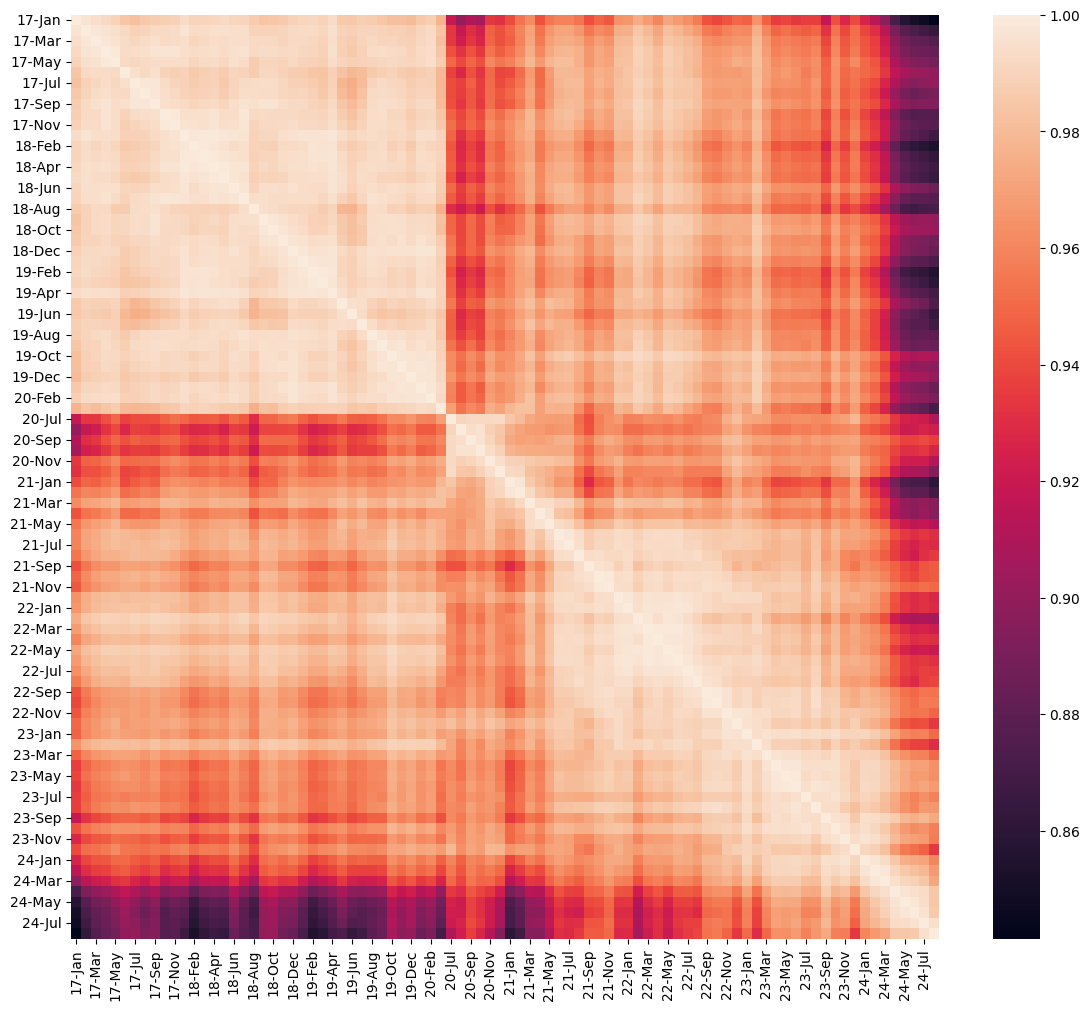

In [19]:
f,ax = plt.subplots(figsize = (14,12))
#plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation)
#does not give much information consider removing

<Axes: title={'center': 'Correlation of Numeric Features with each other'}>

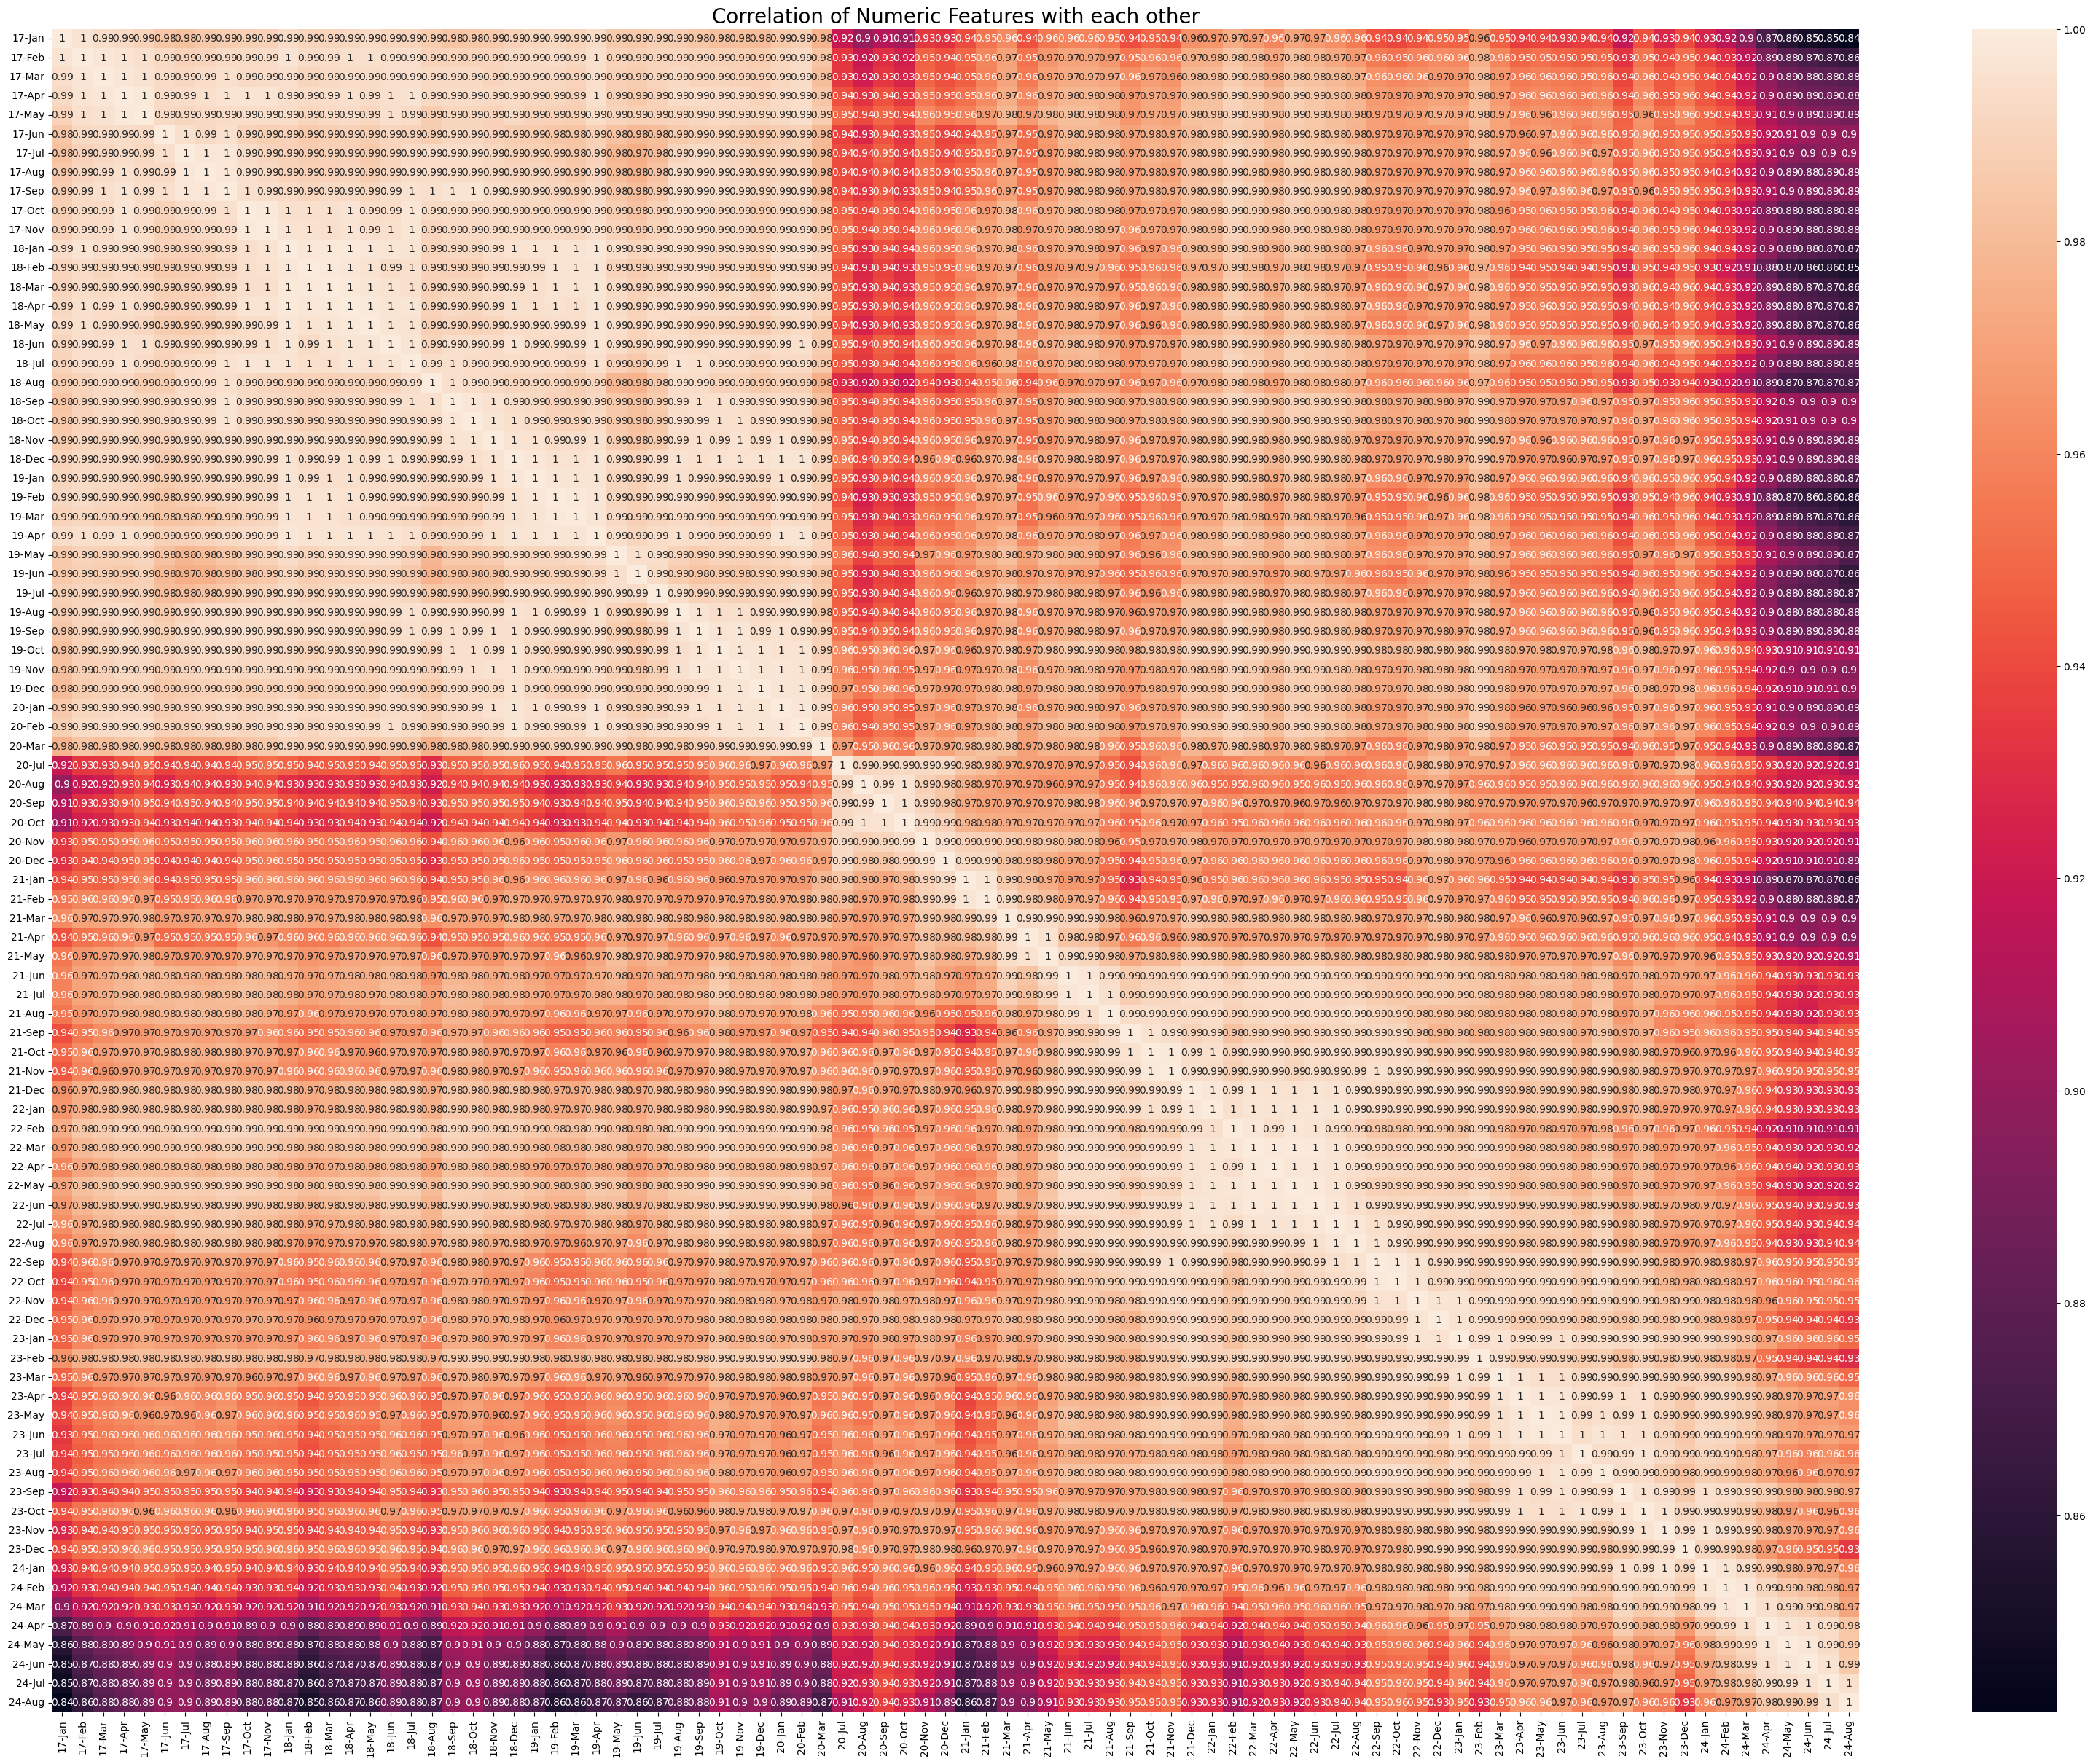

In [20]:
f,ax = plt.subplots(figsize = (40,30))
plt.title('Correlation of Numeric Features with each other',y=1,size=20)
sns.heatmap(correlation,annot=True)

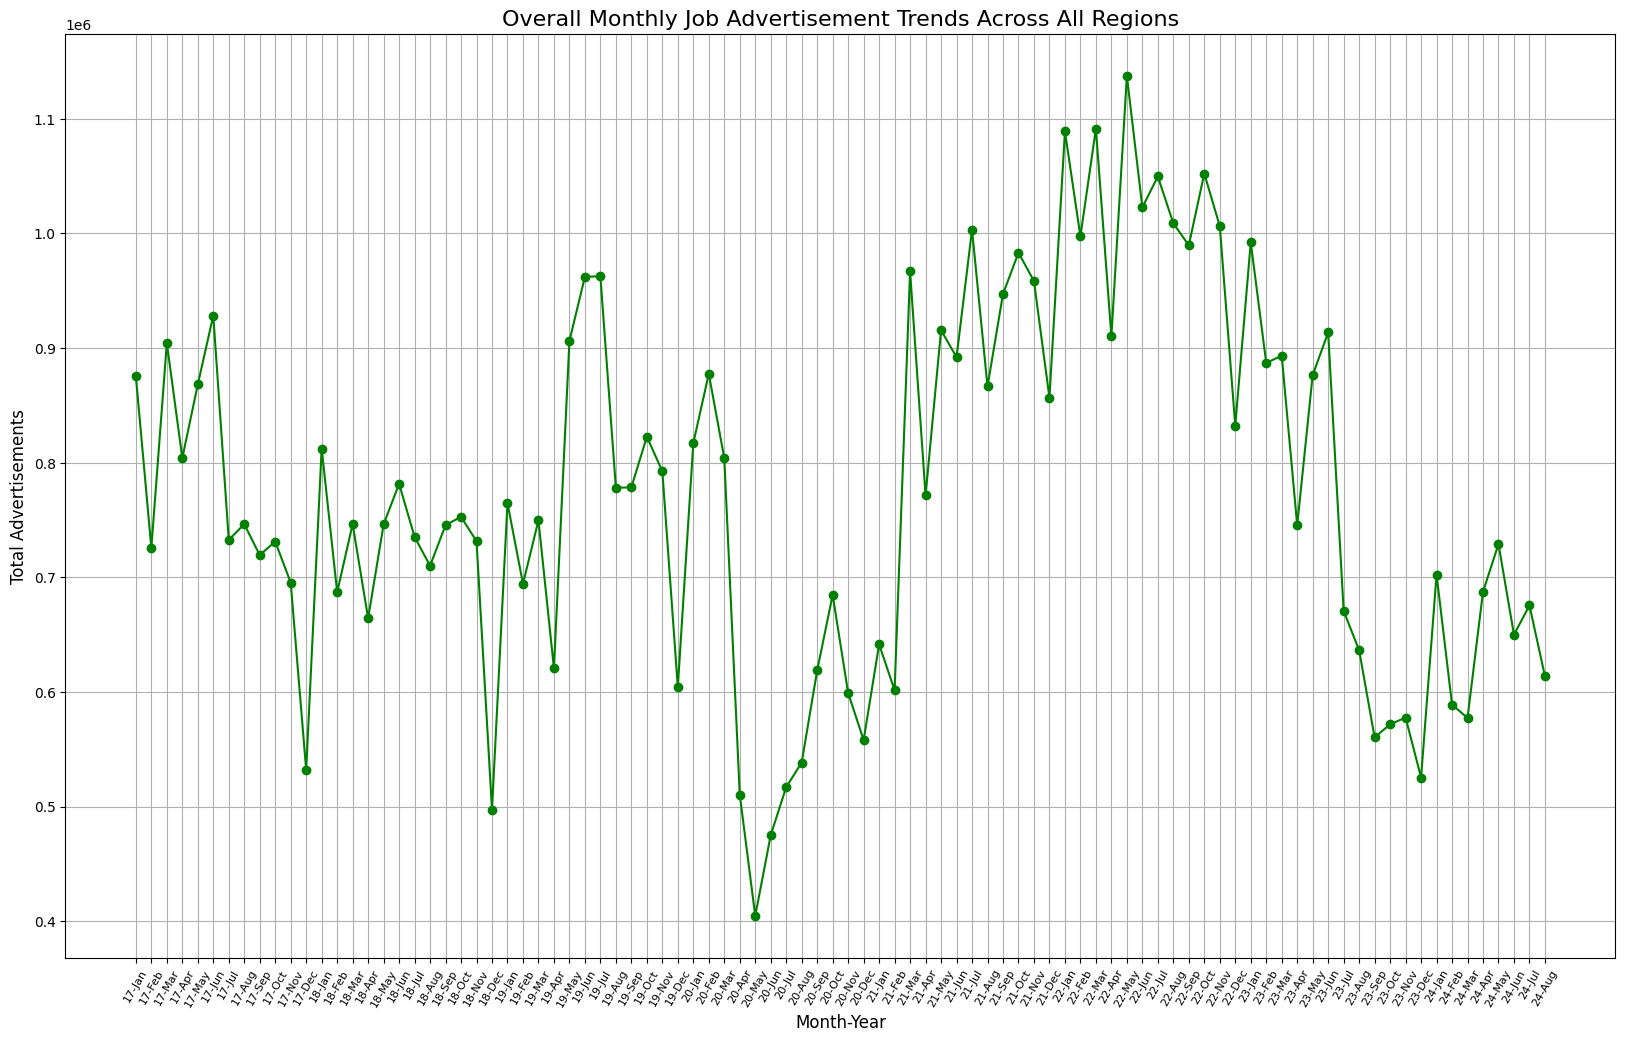

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure numeric data
numeric_data = data.loc[:, '17-Jan':'24-Aug'].apply(pd.to_numeric, errors='coerce')

# Sum values across all regions for each month
overall_trend = numeric_data.sum(axis=0)  # Summing across rows (regions)

# Plot the overall trend with a larger figure size
plt.figure(figsize=(20, 12))  # Adjusting the graph size: width = 15 inches, height = 8 inches
# Customize the y-axis to show standard numbers
plt.plot(overall_trend.index, overall_trend.values, marker='o', color='green')
plt.title('Overall Monthly Job Advertisement Trends Across All Regions', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Advertisements', fontsize=12)
plt.xticks(rotation=60, fontsize=8)  # Rotate x-axis labels for better readability
plt.grid(True)

# Save the figure
plt.savefig('overall_trend_large.png', format='png')

# Show the plot
plt.show()

<Figure size 2000x1200 with 0 Axes>

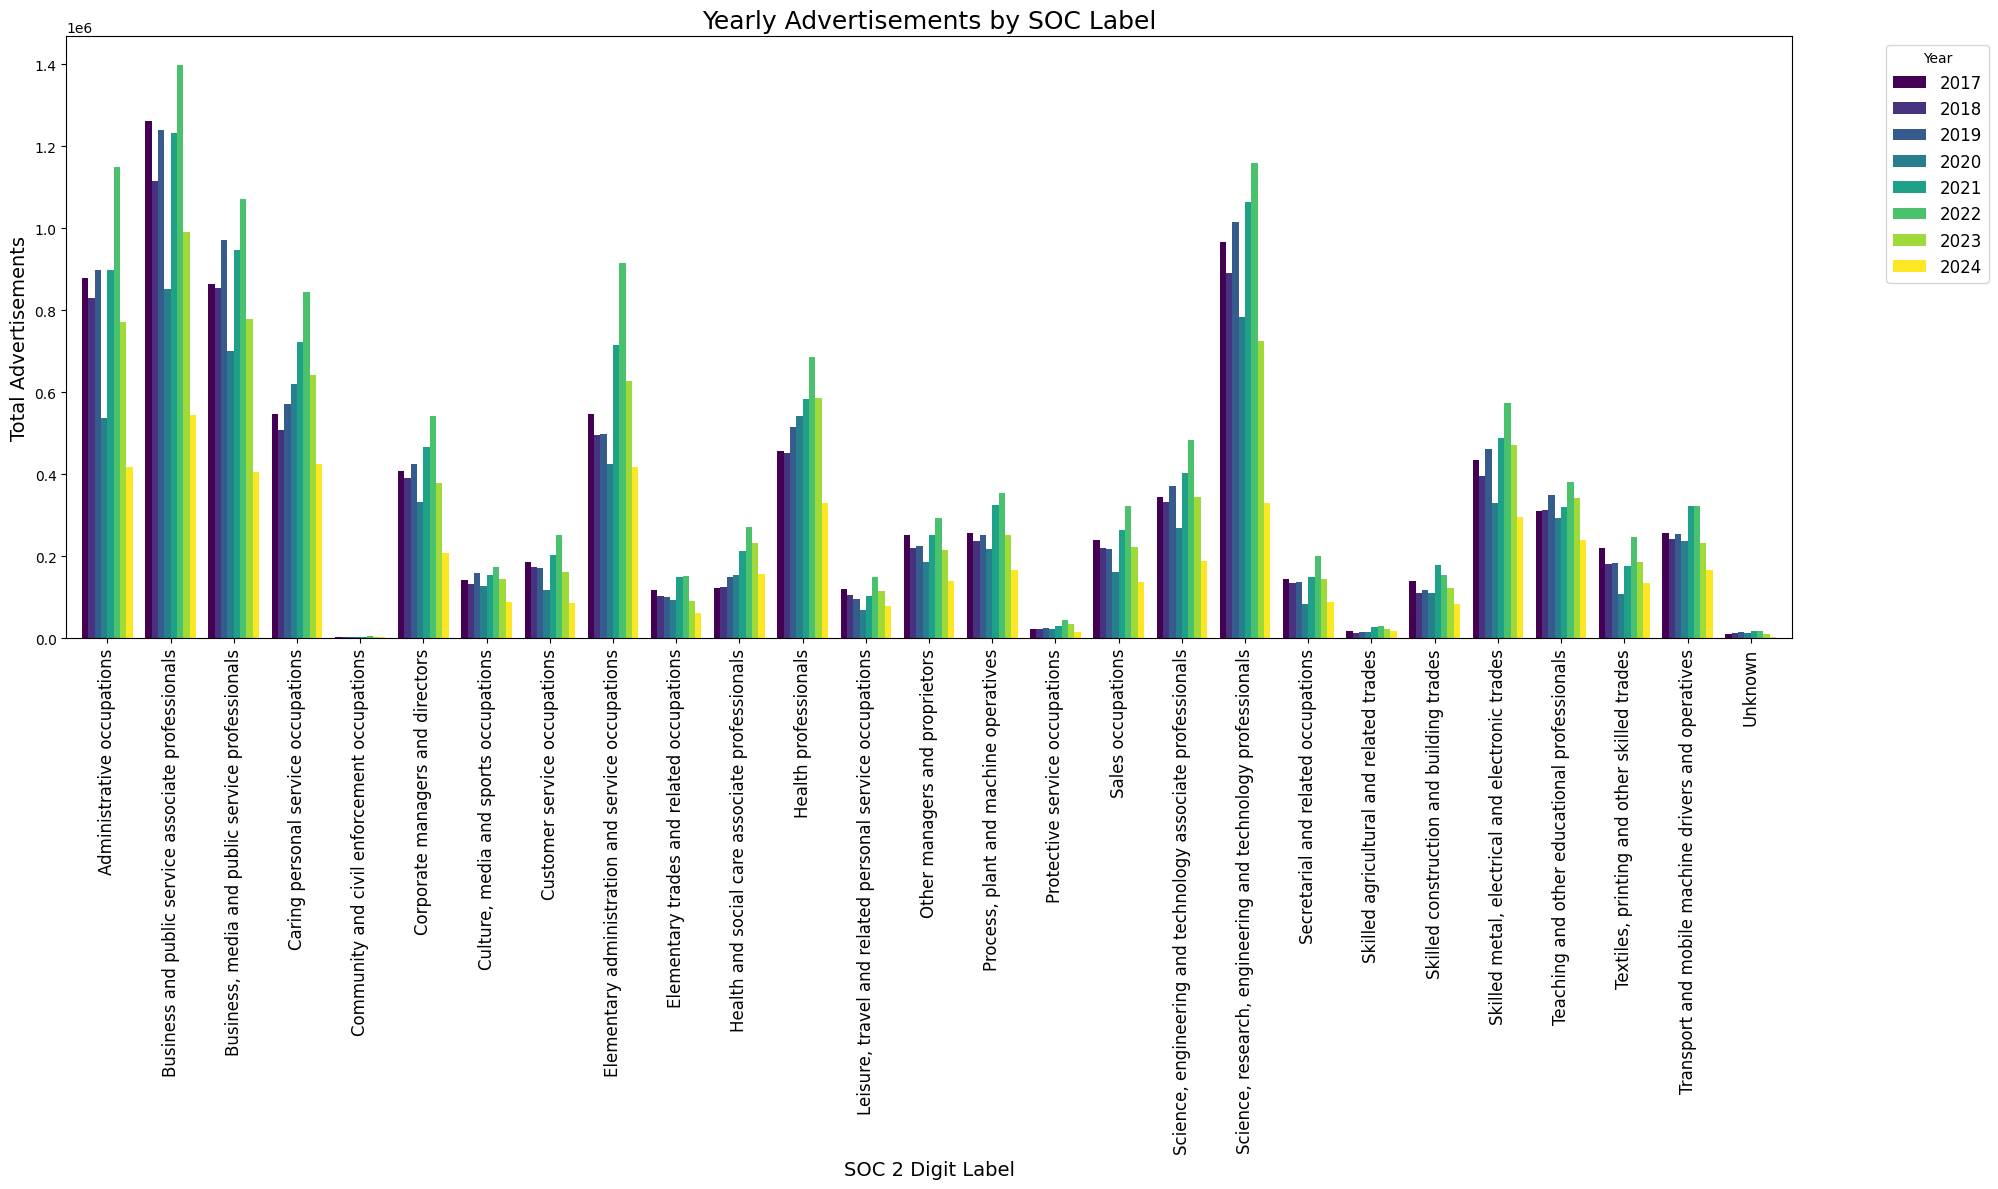

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure numeric data by coercing non-numeric values to NaN
numeric_data = data.loc[:, '17-Jan':'24-Aug'].apply(pd.to_numeric, errors='coerce')

# Step 2: Define yearly columns dynamically
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
yearly_columns = {
    year: [col for col in numeric_data.columns if col.startswith(year[-2:])]
    for year in years
}

# Step 3: Create a new DataFrame for yearly totals
yearly_totals = pd.DataFrame({
    year: numeric_data[columns].sum(axis=1) for year, columns in yearly_columns.items()
})

# Step 4: Add SOC labels for reference
yearly_totals['SOC 2 digit label'] = data['SOC 2 digit label']

# Step 5: Group by SOC label and sum advertisements for each year
soc_yearly_totals = yearly_totals.groupby('SOC 2 digit label').sum()

# Step 6: Set up an expanded figure area for better visualization
plt.figure(figsize=(20, 12))

# Step 7: Plot the data and explicitly provide the column labels as the legend
ax = soc_yearly_totals.drop(columns=['SOC 2 digit label'], errors='ignore').plot(
    kind='bar', colormap='viridis', figsize=(20, 12), width=0.8
)

# Step 8: Customize plot appearance
plt.title('Yearly Advertisements by SOC Label', fontsize=18)
plt.xlabel('SOC 2 Digit Label', fontsize=14)
plt.ylabel('Total Advertisements', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title='Year', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Yearly Advertisements by SOC Label.png', format='png')
# Step 9: Show the plot
plt.show()


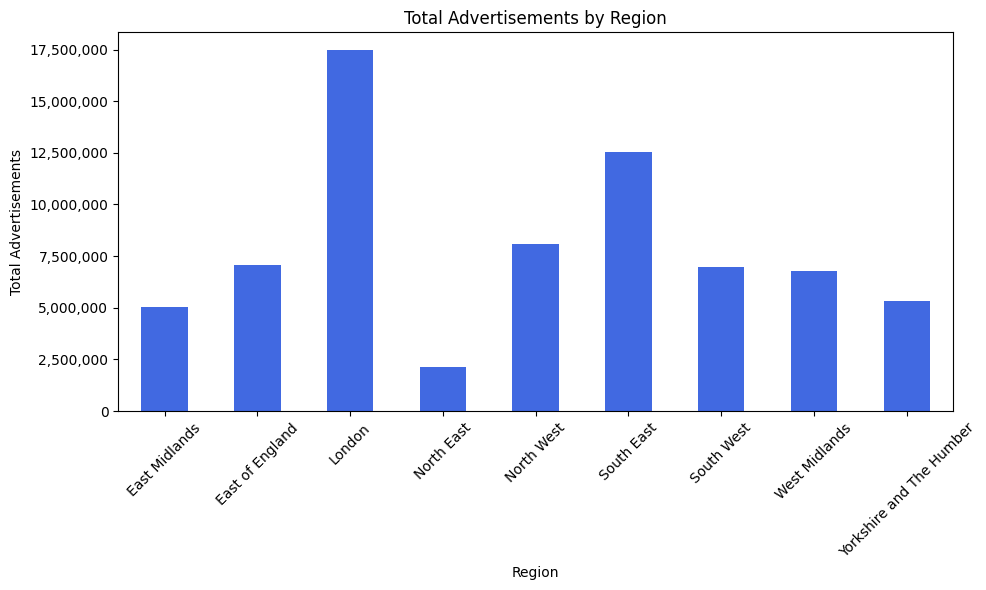

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Coerce non-numeric values to NaN for the relevant columns
numeric_data = data.loc[:, '17-Jan':'24-Aug'].apply(pd.to_numeric, errors='coerce')

# Group by 'Region' and sum only numeric data
region_totals = numeric_data.groupby(data['Region']).sum()

# Sum across all months for each region
region_totals_sum = region_totals.sum(axis=1)

# Plot the total contributions by region
region_totals_sum.plot(kind='bar', figsize=(10, 6), color='royalblue')

# Customize the y-axis to show standard numbers
plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Change scientific notation to regular numbers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Add commas for readability

# Add chart labels and formatting
plt.title('Total Advertisements by Region')
plt.xlabel('Region')
plt.ylabel('Total Advertisements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Total contr.png', format='png')
plt.show()

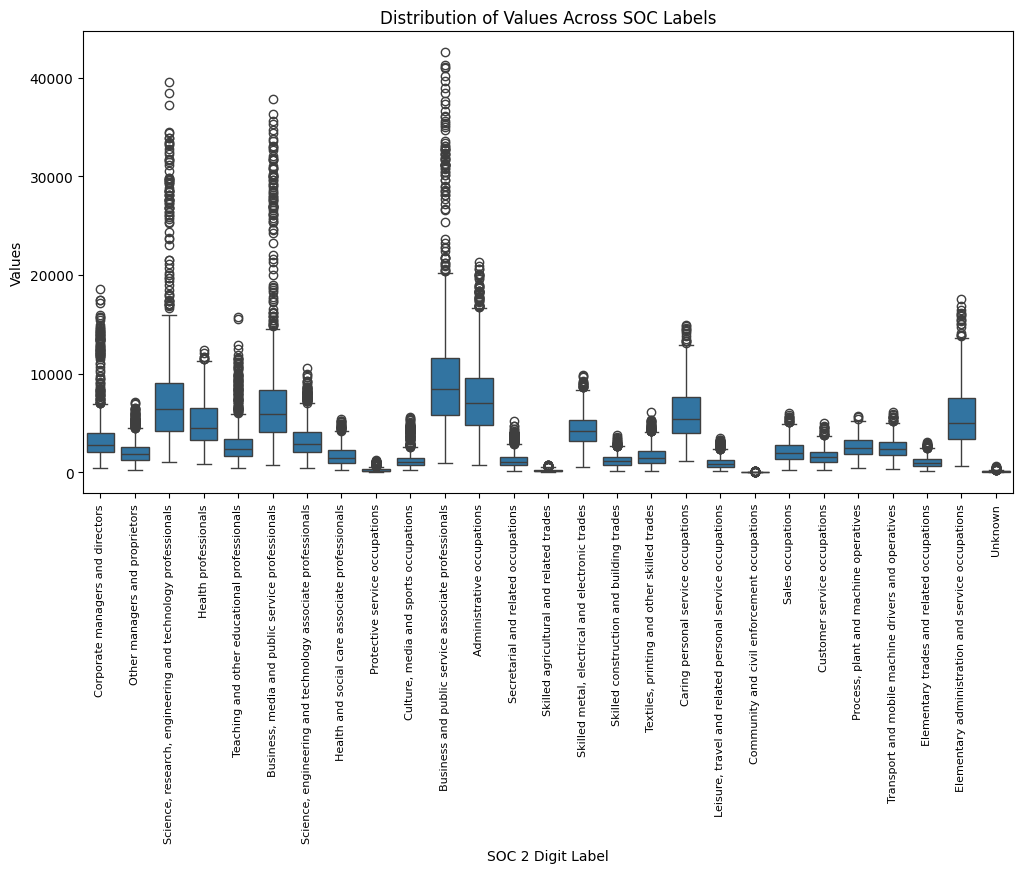

In [24]:
# Coerce non-numeric values to NaN for the relevant columns
data.loc[:, data.columns[4:]] = data.loc[:, data.columns[4:]].apply(pd.to_numeric, errors='coerce')

# Melt the DataFrame to prepare for boxplot visualization
melted_data = data.melt(id_vars=['SOC 2 digit label'], value_vars=data.columns[4:])

# Plot the boxplot with only numeric values included
plt.figure(figsize=(12, 6))
sns.boxplot(x='SOC 2 digit label', y='value', data=melted_data)
plt.title('Distribution of Values Across SOC Labels')
plt.xlabel('SOC 2 Digit Label')
plt.ylabel('Values')
plt.xticks(rotation=90, fontsize=8)
plt.savefig('Distribution by SOC Label.png', format='png', bbox_inches='tight')
plt.show()

TASK 2: DATA PREPROCESSING

In [25]:
data.head()

Region SOC 2 digit code  \
0  East Midlands               11   
1  East Midlands               12   
2  East Midlands               21   
3  East Midlands               22   
4  East Midlands               23   

                                   SOC 2 digit label  \
0                   Corporate managers and directors   
1                     Other managers and proprietors   
2  Science, research, engineering and technology ...   
3                               Health professionals   
4       Teaching and other educational professionals   

  Prioritise using SOC 2 as high or low  17-Jan  17-Feb  17-Mar  17-Apr  \
0                                  high    2315  1955.0    2380  1950.0   
1                                   low    1420  1240.0    1465  1250.0   
2                                   low    5010  4165.0    5170  4775.0   
3                                  high    2565  2020.0    2670  2515.0   
4                                   low    2075  1850.0    2160  1670.0   

   17-May  17-Jun  ...  23-Nov  23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  \
0  2210.0    2080  ...  1500.0    1400    1850    1525    1540  1785.0   
1  1475.0    1555  ...  1020.0     915    1295    1105    1050  1350.0   
2  5130.0    4580  ...  2445.0    2395    3045    2575    2510  2620.0   
3  2890.0    2655  ...  3300.0    2915    3380    2770    2845  3200.0   
4  1940.0    2200  ...  1700.0    1825    2135    2035    2270  2400.0   

   24-May  24-Jun  24-Jul  24-Aug  
0    1870    1610    1830    1565  
1    1440    1330    1275    1295  
2    2635    2270    2315    2270  
3    3260    2895    2965    2635  
4    2805    2225    1945    1560  

[5 rows x 96 columns]

In [26]:
data.isnull().sum()

Region                                    0
SOC 2 digit code                          0
SOC 2 digit label                         0
Prioritise using SOC 2 as high or low    29
17-Jan                                    0
                                         ..
24-Apr                                    1
24-May                                    0
24-Jun                                    0
24-Jul                                    0
24-Aug                                    0
Length: 96, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 96 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Region                                 243 non-null    object 
 1   SOC 2 digit code                       243 non-null    object 
 2   SOC 2 digit label                      243 non-null    object 
 3   Prioritise using SOC 2 as high or low  214 non-null    object 
 4   17-Jan                                 243 non-null    int64  
 5   17-Feb                                 242 non-null    float64
 6   17-Mar                                 243 non-null    int64  
 7   17-Apr                                 242 non-null    float64
 8   17-May                                 241 non-null    float64
 9   17-Jun                                 243 non-null    int64  
 10  17-Jul                                 243 non-null    int64  
 11  17-Aug

In [28]:
# Create a copy of the original DataFrame
new_data = data.copy()

# List of columns you want to check and replace '[x]' with 0
columns_to_check = ['17-Dec', '20-Apr', '20-May', '20-Jun']  # Replace this with your specific columns

# Replace '[x]' with 0 in the specified columns of the new DataFrame
for col in columns_to_check:
    # Ensure the replacement is successful
    new_data[col] = new_data[col].replace('[x]', 0)

# Verify changes by displaying the updated columns
print(new_data[columns_to_check])

#save the new DataFrame to a CSV file, you can use:
new_data.to_csv('updated_data.csv', index=False)
#I replaced the [x] with 0, as it is logical, the dataset has both the [x] and empty datapoints so logically, i replaced the [x] with 0 and below, filled the empty with the mean of the column

     17-Dec  20-Apr  20-May  20-Jun
0    1330.0  1185.0  1175.0  1195.0
1     780.0   900.0   780.0   925.0
2    3375.0  3100.0  2370.0  2765.0
3    1990.0  3145.0  2865.0  2955.0
4    1225.0  1605.0  1465.0  1315.0
..      ...     ...     ...     ...
238  1115.0  1170.0   950.0  1225.0
239  1180.0   890.0   790.0  1160.0
240   350.0   295.0   310.0   410.0
241  1845.0  2000.0  1730.0  2040.0
242    45.0    55.0    30.0    55.0

[243 rows x 4 columns]


In [28]:
one =pd.read_csv('updated_data.csv')
one.head(7)

Region SOC 2 digit code  \
0  East Midlands               11   
1  East Midlands               12   
2  East Midlands               21   
3  East Midlands               22   
4  East Midlands               23   
5  East Midlands               24   
6  East Midlands               31   

                                   SOC 2 digit label  \
0                   Corporate managers and directors   
1                     Other managers and proprietors   
2  Science, research, engineering and technology ...   
3                               Health professionals   
4       Teaching and other educational professionals   
5   Business, media and public service professionals   
6  Science, engineering and technology associate ...   

  Prioritise using SOC 2 as high or low  17-Jan  17-Feb  17-Mar  17-Apr  \
0                                  high    2315  1955.0    2380  1950.0   
1                                   low    1420  1240.0    1465  1250.0   
2                                   low    5010  4165.0    5170  4775.0   
3                                  high    2565  2020.0    2670  2515.0   
4                                   low    2075  1850.0    2160  1670.0   
5                                   NaN    4005  3540.0    4215  3745.0   
6                                   NaN    2215  2125.0    2560  2070.0   

   17-May  17-Jun  ...  23-Nov  23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  \
0  2210.0    2080  ...  1500.0    1400    1850    1525    1540  1785.0   
1  1475.0    1555  ...  1020.0     915    1295    1105    1050  1350.0   
2  5130.0    4580  ...  2445.0    2395    3045    2575    2510  2620.0   
3  2890.0    2655  ...  3300.0    2915    3380    2770    2845  3200.0   
4  1940.0    2200  ...  1700.0    1825    2135    2035    2270  2400.0   
5  4155.0    4365  ...  2950.0    2745    3635    2800    2585  2935.0   
6  2320.0    2150  ...  1570.0    1590    2025    1630    1655  1845.0   

   24-May  24-Jun  24-Jul  24-Aug  
0    1870    1610    1830    1565  
1    1440    1330    1275    1295  
2    2635    2270    2315    2270  
3    3260    2895    2965    2635  
4    2805    2225    1945    1560  
5    3020    2530    2725    2485  
6    1965    1840    1850    1745  

[7 rows x 96 columns]

In [29]:
one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 96 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Region                                 243 non-null    object 
 1   SOC 2 digit code                       243 non-null    object 
 2   SOC 2 digit label                      243 non-null    object 
 3   Prioritise using SOC 2 as high or low  214 non-null    object 
 4   17-Jan                                 243 non-null    int64  
 5   17-Feb                                 242 non-null    float64
 6   17-Mar                                 243 non-null    int64  
 7   17-Apr                                 242 non-null    float64
 8   17-May                                 241 non-null    float64
 9   17-Jun                                 243 non-null    int64  
 10  17-Jul                                 243 non-null    int64  
 11  17-Aug

In [30]:
# Select all columns starting from the 5th column (index 4)
columns_to_fill = one.columns[4:]

# Fill empty (NaN) values with the median of each column
for col in columns_to_fill:
    one[col] = one[col].fillna(one[col].median())

# Save the updated DataFrame as a new DataFrame
new_df = one.copy()
#save as csv
new_df.to_csv('new_data_one.csv', index=False)
# Display the new DataFrame
new_df.head(7)

Region SOC 2 digit code  \
0  East Midlands               11   
1  East Midlands               12   
2  East Midlands               21   
3  East Midlands               22   
4  East Midlands               23   
5  East Midlands               24   
6  East Midlands               31   

                                   SOC 2 digit label  \
0                   Corporate managers and directors   
1                     Other managers and proprietors   
2  Science, research, engineering and technology ...   
3                               Health professionals   
4       Teaching and other educational professionals   
5   Business, media and public service professionals   
6  Science, engineering and technology associate ...   

  Prioritise using SOC 2 as high or low  17-Jan  17-Feb  17-Mar  17-Apr  \
0                                  high    2315  1955.0    2380  1950.0   
1                                   low    1420  1240.0    1465  1250.0   
2                                   low    5010  4165.0    5170  4775.0   
3                                  high    2565  2020.0    2670  2515.0   
4                                   low    2075  1850.0    2160  1670.0   
5                                   NaN    4005  3540.0    4215  3745.0   
6                                   NaN    2215  2125.0    2560  2070.0   

   17-May  17-Jun  ...  23-Nov  23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  \
0  2210.0    2080  ...  1500.0    1400    1850    1525    1540  1785.0   
1  1475.0    1555  ...  1020.0     915    1295    1105    1050  1350.0   
2  5130.0    4580  ...  2445.0    2395    3045    2575    2510  2620.0   
3  2890.0    2655  ...  3300.0    2915    3380    2770    2845  3200.0   
4  1940.0    2200  ...  1700.0    1825    2135    2035    2270  2400.0   
5  4155.0    4365  ...  2950.0    2745    3635    2800    2585  2935.0   
6  2320.0    2150  ...  1570.0    1590    2025    1630    1655  1845.0   

   24-May  24-Jun  24-Jul  24-Aug  
0    1870    1610    1830    1565  
1    1440    1330    1275    1295  
2    2635    2270    2315    2270  
3    3260    2895    2965    2635  
4    2805    2225    1945    1560  
5    3020    2530    2725    2485  
6    1965    1840    1850    1745  

[7 rows x 96 columns]

In [31]:
new_df.info()
#Now, there are no missing numeric values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 96 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Region                                 243 non-null    object 
 1   SOC 2 digit code                       243 non-null    object 
 2   SOC 2 digit label                      243 non-null    object 
 3   Prioritise using SOC 2 as high or low  214 non-null    object 
 4   17-Jan                                 243 non-null    int64  
 5   17-Feb                                 243 non-null    float64
 6   17-Mar                                 243 non-null    int64  
 7   17-Apr                                 243 non-null    float64
 8   17-May                                 243 non-null    float64
 9   17-Jun                                 243 non-null    int64  
 10  17-Jul                                 243 non-null    int64  
 11  17-Aug

In [32]:
new_df.head(7)

Region SOC 2 digit code  \
0  East Midlands               11   
1  East Midlands               12   
2  East Midlands               21   
3  East Midlands               22   
4  East Midlands               23   
5  East Midlands               24   
6  East Midlands               31   

                                   SOC 2 digit label  \
0                   Corporate managers and directors   
1                     Other managers and proprietors   
2  Science, research, engineering and technology ...   
3                               Health professionals   
4       Teaching and other educational professionals   
5   Business, media and public service professionals   
6  Science, engineering and technology associate ...   

  Prioritise using SOC 2 as high or low  17-Jan  17-Feb  17-Mar  17-Apr  \
0                                  high    2315  1955.0    2380  1950.0   
1                                   low    1420  1240.0    1465  1250.0   
2                                   low    5010  4165.0    5170  4775.0   
3                                  high    2565  2020.0    2670  2515.0   
4                                   low    2075  1850.0    2160  1670.0   
5                                   NaN    4005  3540.0    4215  3745.0   
6                                   NaN    2215  2125.0    2560  2070.0   

   17-May  17-Jun  ...  23-Nov  23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  \
0  2210.0    2080  ...  1500.0    1400    1850    1525    1540  1785.0   
1  1475.0    1555  ...  1020.0     915    1295    1105    1050  1350.0   
2  5130.0    4580  ...  2445.0    2395    3045    2575    2510  2620.0   
3  2890.0    2655  ...  3300.0    2915    3380    2770    2845  3200.0   
4  1940.0    2200  ...  1700.0    1825    2135    2035    2270  2400.0   
5  4155.0    4365  ...  2950.0    2745    3635    2800    2585  2935.0   
6  2320.0    2150  ...  1570.0    1590    2025    1630    1655  1845.0   

   24-May  24-Jun  24-Jul  24-Aug  
0    1870    1610    1830    1565  
1    1440    1330    1275    1295  
2    2635    2270    2315    2270  
3    3260    2895    2965    2635  
4    2805    2225    1945    1560  
5    3020    2530    2725    2485  
6    1965    1840    1850    1745  

[7 rows x 96 columns]

In [33]:
# Find unique values and their count in the 4th column (index 3)
unique_values = new_df.iloc[:, 3].unique()
unique_count = new_df.iloc[:, 3].nunique()

print(f"Unique values: {unique_values}")
print(f"Number of unique values: {unique_count}")

Unique values: ['high' 'low' nan]
Number of unique values: 2


In [34]:
# Find unique values and their count in the 2nd column (index 1)
unique_values = new_df.iloc[:, 1].unique()
unique_count = new_df.iloc[:, 1].nunique()

print(f"Unique values: {unique_values}")
print(f"Number of unique values: {unique_count}")

Unique values: ['11' '12' '21' '22' '23' '24' '31' '32' '33' '34' '35' '41' '42' '51'
 '52' '53' '54' '61' '62' '63' '71' '72' '81' '82' '91' '92' 'Unknown']
Number of unique values: 27


In [35]:
#Replacing missing values in Prioritise using SOC 2 as high or low with 'unknown'
row_index = 3  # Replace this with the desired row index
new_df['Prioritise using SOC 2 as high or low'] = new_df['Prioritise using SOC 2 as high or low'].fillna('unknown')

In [36]:
new_df.head(7)

Region SOC 2 digit code  \
0  East Midlands               11   
1  East Midlands               12   
2  East Midlands               21   
3  East Midlands               22   
4  East Midlands               23   
5  East Midlands               24   
6  East Midlands               31   

                                   SOC 2 digit label  \
0                   Corporate managers and directors   
1                     Other managers and proprietors   
2  Science, research, engineering and technology ...   
3                               Health professionals   
4       Teaching and other educational professionals   
5   Business, media and public service professionals   
6  Science, engineering and technology associate ...   

  Prioritise using SOC 2 as high or low  17-Jan  17-Feb  17-Mar  17-Apr  \
0                                  high    2315  1955.0    2380  1950.0   
1                                   low    1420  1240.0    1465  1250.0   
2                                   low    5010  4165.0    5170  4775.0   
3                                  high    2565  2020.0    2670  2515.0   
4                                   low    2075  1850.0    2160  1670.0   
5                               unknown    4005  3540.0    4215  3745.0   
6                               unknown    2215  2125.0    2560  2070.0   

   17-May  17-Jun  ...  23-Nov  23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  \
0  2210.0    2080  ...  1500.0    1400    1850    1525    1540  1785.0   
1  1475.0    1555  ...  1020.0     915    1295    1105    1050  1350.0   
2  5130.0    4580  ...  2445.0    2395    3045    2575    2510  2620.0   
3  2890.0    2655  ...  3300.0    2915    3380    2770    2845  3200.0   
4  1940.0    2200  ...  1700.0    1825    2135    2035    2270  2400.0   
5  4155.0    4365  ...  2950.0    2745    3635    2800    2585  2935.0   
6  2320.0    2150  ...  1570.0    1590    2025    1630    1655  1845.0   

   24-May  24-Jun  24-Jul  24-Aug  
0    1870    1610    1830    1565  
1    1440    1330    1275    1295  
2    2635    2270    2315    2270  
3    3260    2895    2965    2635  
4    2805    2225    1945    1560  
5    3020    2530    2725    2485  
6    1965    1840    1850    1745  

[7 rows x 96 columns]

In [37]:
#Dropping column B and C and saving it to a new dataframe
new_data_II = new_df.drop(new_df.columns[[1, 2]], axis=1)
new_data_II.to_csv('new_dataii.csv', index=False)

In [38]:
df_II = pd.read_csv('new_dataii.csv')

In [39]:
df_II.head(7)

Region Prioritise using SOC 2 as high or low  17-Jan  17-Feb  \
0  East Midlands                                  high    2315  1955.0   
1  East Midlands                                   low    1420  1240.0   
2  East Midlands                                   low    5010  4165.0   
3  East Midlands                                  high    2565  2020.0   
4  East Midlands                                   low    2075  1850.0   
5  East Midlands                               unknown    4005  3540.0   
6  East Midlands                               unknown    2215  2125.0   

   17-Mar  17-Apr  17-May  17-Jun  17-Jul  17-Aug  ...  23-Nov  23-Dec  \
0    2380  1950.0  2210.0    2080    1665  1880.0  ...  1500.0    1400   
1    1465  1250.0  1475.0    1555    1130  1145.0  ...  1020.0     915   
2    5170  4775.0  5130.0    4580    3730  3975.0  ...  2445.0    2395   
3    2670  2515.0  2890.0    2655    2315  2415.0  ...  3300.0    2915   
4    2160  1670.0  1940.0    2200    1225  1320.0  ...  1700.0    1825   
5    4215  3745.0  4155.0    4365    3190  3440.0  ...  2950.0    2745   
6    2560  2070.0  2320.0    2150    1850  1870.0  ...  1570.0    1590   

   24-Jan  24-Feb  24-Mar  24-Apr  24-May  24-Jun  24-Jul  24-Aug  
0    1850    1525    1540  1785.0    1870    1610    1830    1565  
1    1295    1105    1050  1350.0    1440    1330    1275    1295  
2    3045    2575    2510  2620.0    2635    2270    2315    2270  
3    3380    2770    2845  3200.0    3260    2895    2965    2635  
4    2135    2035    2270  2400.0    2805    2225    1945    1560  
5    3635    2800    2585  2935.0    3020    2530    2725    2485  
6    2025    1630    1655  1845.0    1965    1840    1850    1745  

[7 rows x 94 columns]

In [40]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [41]:
#encoding regions column
df = pd.read_csv('new_dataii.csv')

# One-hot encode the 'Region' column
encoder = ce.OneHotEncoder(cols='Region', handle_unknown='return_nan', return_df=True, use_cat_names=True)
region_encoded = encoder.fit_transform(df[['Region']])

# Drop the original 'Region' column
df_dropped = df.drop(columns=['Region'])

# Combine the one-hot encoded columns and the remaining dataset, placing encoded columns first
df_updated = pd.concat([region_encoded, df_dropped], axis=1)

# Save the updated dataset to a new CSV file
df_updated.to_csv('updated_dataset_hopefully.csv', index=False)

print("The 'Region' column has been replaced with one-hot encoded columns at the start of the dataset.")


The 'Region' column has been replaced with one-hot encoded columns at the start of the dataset.


In [42]:
papa = pd.read_csv('updated_dataset_hopefully.csv')

In [43]:
papa.head()

Region_East Midlands  Region_East of England  Region_London  \
0                   1.0                     0.0            0.0   
1                   1.0                     0.0            0.0   
2                   1.0                     0.0            0.0   
3                   1.0                     0.0            0.0   
4                   1.0                     0.0            0.0   

   Region_North East  Region_North West  Region_South East  Region_South West  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   Region_West Midlands  Region_Yorkshire and The Humber  \
0                   0.0                              0.0   
1                   0.0                              0.0   
2                   0.0                              0.0   
3                   0.0                              0.0   
4                   0.0                              0.0   

  Prioritise using SOC 2 as high or low  ...  23-Nov  23-Dec  24-Jan  24-Feb  \
0                                  high  ...  1500.0    1400    1850    1525   
1                                   low  ...  1020.0     915    1295    1105   
2                                   low  ...  2445.0    2395    3045    2575   
3                                  high  ...  3300.0    2915    3380    2770   
4                                   low  ...  1700.0    1825    2135    2035   

   24-Mar  24-Apr  24-May  24-Jun  24-Jul  24-Aug  
0    1540  1785.0    1870    1610    1830    1565  
1    1050  1350.0    1440    1330    1275    1295  
2    2510  2620.0    2635    2270    2315    2270  
3    2845  3200.0    3260    2895    2965    2635  
4    2270  2400.0    2805    2225    1945    1560  

[5 rows x 102 columns]

In [44]:
#encoding Prioritise using SOC 2 as high or low columns
df = pd.read_csv('updated_dataset_hopefully.csv')

# One-hot encode the 'Prioritise using SOC 2 as high or low' column
encoder = ce.OneHotEncoder(cols='Prioritise using SOC 2 as high or low', handle_unknown='return_nan', return_df=True, use_cat_names=True)
region_encoded = encoder.fit_transform(df[['Prioritise using SOC 2 as high or low']])

# Drop the original 'Region' column
df_dropped = df.drop(columns=['Prioritise using SOC 2 as high or low'])

# Combine the one-hot encoded columns and the remaining dataset, placing encoded columns first
df_updated = pd.concat([region_encoded, df_dropped], axis=1)

# Save the updated dataset to a new CSV file
df_updated.to_csv('updated_data_hopefully.csv', index=False)

print("The 'Prioritise using SOC 2 as high or low' column has been replaced with one-hot encoded columns at the start of the dataset.")

The 'Prioritise using SOC 2 as high or low' column has been replaced with one-hot encoded columns at the start of the dataset.


In [45]:
papa_kay = pd.read_csv('updated_data_hopefully.csv')
papa_kay.head()

Prioritise using SOC 2 as high or low_high  \
0                                         1.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   

   Prioritise using SOC 2 as high or low_low  \
0                                        0.0   
1                                        1.0   
2                                        1.0   
3                                        0.0   
4                                        1.0   

   Prioritise using SOC 2 as high or low_unknown  Region_East Midlands  \
0                                            0.0                   1.0   
1                                            0.0                   1.0   
2                                            0.0                   1.0   
3                                            0.0                   1.0   
4                                            0.0                   1.0   

   Region_East of England  Region_London  Region_North East  \
0                     0.0            0.0                0.0   
1                     0.0            0.0                0.0   
2                     0.0            0.0                0.0   
3                     0.0            0.0                0.0   
4                     0.0            0.0                0.0   

   Region_North West  Region_South East  Region_South West  ...  23-Nov  \
0                0.0                0.0                0.0  ...  1500.0   
1                0.0                0.0                0.0  ...  1020.0   
2                0.0                0.0                0.0  ...  2445.0   
3                0.0                0.0                0.0  ...  3300.0   
4                0.0                0.0                0.0  ...  1700.0   

   23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  24-May  24-Jun  24-Jul  24-Aug  
0    1400    1850    1525    1540  1785.0    1870    1610    1830    1565  
1     915    1295    1105    1050  1350.0    1440    1330    1275    1295  
2    2395    3045    2575    2510  2620.0    2635    2270    2315    2270  
3    2915    3380    2770    2845  3200.0    3260    2895    2965    2635  
4    1825    2135    2035    2270  2400.0    2805    2225    1945    1560  

[5 rows x 104 columns]

NORMALIZATION USING ROBUST SCALER

In [46]:
#normalization begins here 
from sklearn.preprocessing import RobustScaler

ml_data = pd.read_csv('updated_data_hopefully.csv') 

onehot_cols = [col for col in df.columns if col.startswith(('Region_','Prioritise using SOC 2 as high or low_'))]

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# We want to scale only those numeric columns that are not part of the one-hot encoded ones.
cols_to_scale = [col for col in numeric_cols if col not in onehot_cols]

# Instantiate the RobustScaler
scaler = RobustScaler()

# Apply robust scaling to the selected numerical columns
ml_data[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])



#save normalized data
ml_data.to_csv('normalized_dataset_one.csv', index=False)

# Optionally, check the first few rows to see if the scaling worked
ml_data.head()

Prioritise using SOC 2 as high or low_high  \
0                                         1.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   

   Prioritise using SOC 2 as high or low_low  \
0                                        0.0   
1                                        1.0   
2                                        1.0   
3                                        0.0   
4                                        1.0   

   Prioritise using SOC 2 as high or low_unknown  Region_East Midlands  \
0                                            0.0                   1.0   
1                                            0.0                   1.0   
2                                            0.0                   1.0   
3                                            0.0                   1.0   
4                                            0.0                   1.0   

   Region_East of England  Region_London  Region_North East  \
0                     0.0            0.0                0.0   
1                     0.0            0.0                0.0   
2                     0.0            0.0                0.0   
3                     0.0            0.0                0.0   
4                     0.0            0.0                0.0   

   Region_North West  Region_South East  Region_South West  ...    23-Nov  \
0                0.0                0.0                0.0  ... -0.045455   
1                0.0                0.0                0.0  ... -0.223562   
2                0.0                0.0                0.0  ...  0.305195   
3                0.0                0.0                0.0  ...  0.622449   
4                0.0                0.0                0.0  ...  0.028757   

     23-Dec    24-Jan    24-Feb    24-Mar    24-Apr    24-May    24-Jun  \
0  0.043651 -0.006079 -0.039042 -0.037534 -0.097638 -0.134417 -0.164243   
1 -0.148810 -0.174772 -0.188110 -0.212690 -0.234646 -0.261448 -0.260051   
2  0.438492  0.357143  0.333629  0.309205  0.165354  0.091581  0.061591   
3  0.644841  0.458967  0.402839  0.428954  0.348031  0.276219  0.275449   
4  0.212302  0.080547  0.141970  0.223414  0.096063  0.141802  0.046193   

     24-Jul    24-Aug  
0 -0.120032 -0.132127  
1 -0.300081 -0.229864  
2  0.037307  0.123077  
3  0.248175  0.255204  
4 -0.082725 -0.133937  

[5 rows x 104 columns]

TASK 4: USING RANDOM FOREST REGRESSOR

In [47]:
#Random Forest Regressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [48]:
# Load the preprocessed (normalized) dataset that already contains one-hot encoded columns.
df_random = pd.read_csv('normalized_dataset_one.csv')
df_random.head()

Prioritise using SOC 2 as high or low_high  \
0                                         1.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   

   Prioritise using SOC 2 as high or low_low  \
0                                        0.0   
1                                        1.0   
2                                        1.0   
3                                        0.0   
4                                        1.0   

   Prioritise using SOC 2 as high or low_unknown  Region_East Midlands  \
0                                            0.0                   1.0   
1                                            0.0                   1.0   
2                                            0.0                   1.0   
3                                            0.0                   1.0   
4                                            0.0                   1.0   

   Region_East of England  Region_London  Region_North East  \
0                     0.0            0.0                0.0   
1                     0.0            0.0                0.0   
2                     0.0            0.0                0.0   
3                     0.0            0.0                0.0   
4                     0.0            0.0                0.0   

   Region_North West  Region_South East  Region_South West  ...    23-Nov  \
0                0.0                0.0                0.0  ... -0.045455   
1                0.0                0.0                0.0  ... -0.223562   
2                0.0                0.0                0.0  ...  0.305195   
3                0.0                0.0                0.0  ...  0.622449   
4                0.0                0.0                0.0  ...  0.028757   

     23-Dec    24-Jan    24-Feb    24-Mar    24-Apr    24-May    24-Jun  \
0  0.043651 -0.006079 -0.039042 -0.037534 -0.097638 -0.134417 -0.164243   
1 -0.148810 -0.174772 -0.188110 -0.212690 -0.234646 -0.261448 -0.260051   
2  0.438492  0.357143  0.333629  0.309205  0.165354  0.091581  0.061591   
3  0.644841  0.458967  0.402839  0.428954  0.348031  0.276219  0.275449   
4  0.212302  0.080547  0.141970  0.223414  0.096063  0.141802  0.046193   

     24-Jul    24-Aug  
0 -0.120032 -0.132127  
1 -0.300081 -0.229864  
2  0.037307  0.123077  
3  0.248175  0.255204  
4 -0.082725 -0.133937  

[5 rows x 104 columns]

In [49]:
# Load the preprocessed (normalized) dataset that already contains one-hot encoded columns.
df_random = pd.read_csv('normalized_dataset_one.csv')

# Define the target column.
target_col = "24-Aug"
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in the dataset.")

# Separate features (X) and target (y).
X = df_random.drop(columns=[target_col])
y = df_random[target_col]

# Perform a train-validate-test split.
# First, split the data into training and temporary sets (e.g., 60% train, 40% temp).
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42)

# Then split the temporary set equally into validation and test sets (each 20% of the original data).
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

print("Dataset sizes:")
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Dataset sizes:
Training set: (145, 103) (145,)
Validation set: (49, 103) (49,)
Test set: (49, 103) (49,)


In [50]:
# Initialize the RandomForestRegressor.
rfr = RandomForestRegressor(
    n_estimators=100,         # Number of trees
    random_state=42,          # Random seed for reproducibility
    n_jobs=-1,                # Use all available processors
    max_depth=None,             # Maximum depth of the trees (adjust as needed)
    min_samples_split=2,     # Minimum number of samples required to split a node
    min_samples_leaf=1        # Minimum number of samples required to be at a leaf node
)

# Train the model on the training set.
rfr.fit(X_train, y_train)

# Predict on the validation set.
y_val_pred = rfr.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Validation RMSE: {:.4f}".format(val_rmse))

# Once you are happy with hyperparameters based on the validation set,
# you can evaluate your final model on the test set.
y_test_pred = rfr.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE: {:.4f}".format(test_rmse))

Validation RMSE: 0.2132
Test RMSE: 0.0960


In [51]:
# Create a DataFrame to compare predicted vs actual values
y_test_pred = rfr.predict(X_test)
comparison_df = pd.DataFrame({
    "Actual Values (Test Data)": y_test.values,
    "Predicted Values (Test Data)": y_test_pred
})

# Display the first few rows for validation
print("Comparison of Actual vs Predicted Values for 'Aug-24 Advert Count':")
print(comparison_df.head())  # Show only a few rows

# Optionally save the comparison to a CSV file
comparison_df.to_csv('comparison_aug_24.csv', index=False)
print("Comparison saved to 'comparison_aug_24.csv'.")

Comparison of Actual vs Predicted Values for 'Aug-24 Advert Count':
   Actual Values (Test Data)  Predicted Values (Test Data)
0                   0.743891                      0.816489
1                  -0.275113                     -0.181792
2                  -0.209955                     -0.259041
3                   0.128507                      0.143946
4                   1.084163                      1.105213
Comparison saved to 'comparison_aug_24.csv'.


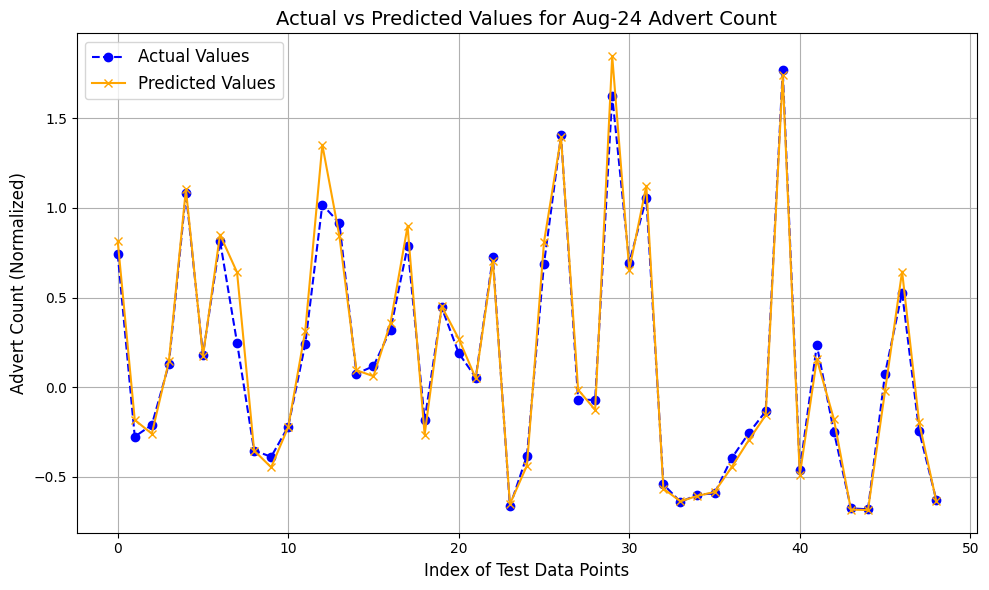

In [52]:
# Load the comparison CSV file
comparison_df = pd.read_csv('comparison_aug_24.csv')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual Values (Test Data)'], label='Actual Values', marker='o', linestyle='--', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted Values (Test Data)'], label='Predicted Values', marker='x', linestyle='-', color='orange')

# Add labels and title
plt.title('Actual vs Predicted Values for Aug-24 Advert Count', fontsize=14)
plt.xlabel('Index of Test Data Points', fontsize=12)
plt.ylabel('Advert Count (Normalized)', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('Actual vs predicted 2024.png', format='png', bbox_inches='tight')
# Show the plot
plt.show()

In [53]:
from sklearn.metrics import r2_score
y_train_pred = rfr.predict(X_train)
# Compute R² scores
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Validation R²: {:.4f}".format(val_r2))
print("Test R²: {:.4f}".format(test_r2))
print("Training R²: {:.4f}".format(r2_train))

Validation R²: 0.9307
Test R²: 0.9767
Training R²: 0.9957


In [54]:
#overfitting check
y_train_pred = rfr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE: {:.4f}".format(train_rmse))


Training RMSE: 0.0609


In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Predict on test data
y_test_pred = rfr.predict(X_test)

# Calculate R² for test data
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate MAE for test data
mae_test = mean_absolute_error(y_test, y_test_pred)



# Create the report in a dictionary format
results = {
    "R²": r2_test,
    "RMSE": rmse_test,
    "MAE": mae_test,
}

# Print out the results (you can store these in a file or display them as needed)
print("Model Performance Report:")
print(f"R² (Test): {r2_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")

Model Performance Report:
R² (Test): 0.9767
RMSE (Test): 0.0960
MAE (Test): 0.0596


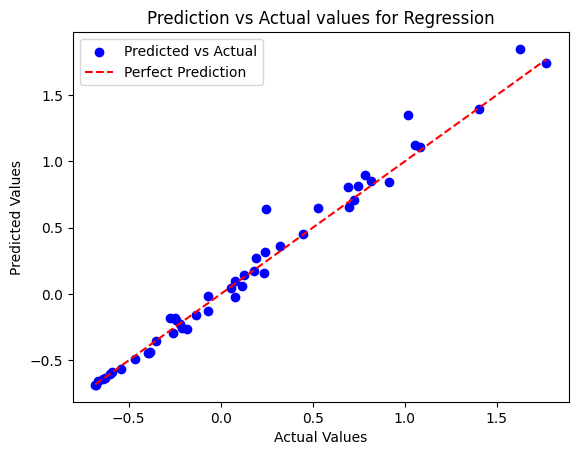

In [56]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.scatter(y_test, y_test_pred, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual values for Regression")
plt.legend()
plt.savefig('Predicted vs actual scatterplot.png', format='png', bbox_inches='tight')
plt.show()

ALGOTITHM FOR CLASSIFICATION MODEL

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.inspection import permutation_importance

In [105]:
svm_one = pd.read_csv('new_data_one.csv')
svm_one.head(7)

Region SOC 2 digit code  \
0  East Midlands               11   
1  East Midlands               12   
2  East Midlands               21   
3  East Midlands               22   
4  East Midlands               23   
5  East Midlands               24   
6  East Midlands               31   

                                   SOC 2 digit label  \
0                   Corporate managers and directors   
1                     Other managers and proprietors   
2  Science, research, engineering and technology ...   
3                               Health professionals   
4       Teaching and other educational professionals   
5   Business, media and public service professionals   
6  Science, engineering and technology associate ...   

  Prioritise using SOC 2 as high or low  17-Jan  17-Feb  17-Mar  17-Apr  \
0                                  high    2315  1955.0    2380  1950.0   
1                                   low    1420  1240.0    1465  1250.0   
2                                   low    5010  4165.0    5170  4775.0   
3                                  high    2565  2020.0    2670  2515.0   
4                                   low    2075  1850.0    2160  1670.0   
5                                   NaN    4005  3540.0    4215  3745.0   
6                                   NaN    2215  2125.0    2560  2070.0   

   17-May  17-Jun  ...  23-Nov  23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  \
0  2210.0    2080  ...  1500.0    1400    1850    1525    1540  1785.0   
1  1475.0    1555  ...  1020.0     915    1295    1105    1050  1350.0   
2  5130.0    4580  ...  2445.0    2395    3045    2575    2510  2620.0   
3  2890.0    2655  ...  3300.0    2915    3380    2770    2845  3200.0   
4  1940.0    2200  ...  1700.0    1825    2135    2035    2270  2400.0   
5  4155.0    4365  ...  2950.0    2745    3635    2800    2585  2935.0   
6  2320.0    2150  ...  1570.0    1590    2025    1630    1655  1845.0   

   24-May  24-Jun  24-Jul  24-Aug  
0    1870    1610    1830    1565  
1    1440    1330    1275    1295  
2    2635    2270    2315    2270  
3    3260    2895    2965    2635  
4    2805    2225    1945    1560  
5    3020    2530    2725    2485  
6    1965    1840    1850    1745  

[7 rows x 96 columns]

In [106]:
svm_one_clean = svm_one.drop(svm_one.columns[1:3], axis=1)
svm_one_clean

Region Prioritise using SOC 2 as high or low  17-Jan  \
0               East Midlands                                  high    2315   
1               East Midlands                                   low    1420   
2               East Midlands                                   low    5010   
3               East Midlands                                  high    2565   
4               East Midlands                                   low    2075   
..                        ...                                   ...     ...   
238  Yorkshire and The Humber                                   low    1635   
239  Yorkshire and The Humber                                  high    1435   
240  Yorkshire and The Humber                                   low     490   
241  Yorkshire and The Humber                                  high    2610   
242  Yorkshire and The Humber                                  high      85   

     17-Feb  17-Mar  17-Apr  17-May  17-Jun  17-Jul  17-Aug  ...  23-Nov  \
0    1955.0    2380  1950.0  2210.0    2080    1665  1880.0  ...  1500.0   
1    1240.0    1465  1250.0  1475.0    1555    1130  1145.0  ...  1020.0   
2    4165.0    5170  4775.0  5130.0    4580    3730  3975.0  ...  2445.0   
3    2020.0    2670  2515.0  2890.0    2655    2315  2415.0  ...  3300.0   
4    1850.0    2160  1670.0  1940.0    2200    1225  1320.0  ...  1700.0   
..      ...     ...     ...     ...     ...     ...     ...  ...     ...   
238  1600.0    2190  1985.0  2125.0    2175    1775  1865.0  ...  1385.0   
239  1280.0    1735  1685.0  1870.0    2290    1840  1905.0  ...  1190.0   
240   590.0     845   660.0   855.0     845     815   810.0  ...   375.0   
241  2960.0    3825  3680.0  3945.0    5215    3760  3150.0  ...  2840.0   
242    65.0      85    45.0    70.0      55      55    65.0  ...    35.0   

     23-Dec  24-Jan  24-Feb  24-Mar  24-Apr  24-May  24-Jun  24-Jul  24-Aug  
0      1400    1850    1525    1540  1785.0    1870    1610    1830    1565  
1       915    1295    1105    1050  1350.0    1440    1330    1275    1295  
2      2395    3045    2575    2510  2620.0    2635    2270    2315    2270  
3      2915    3380    2770    2845  3200.0    3260    2895    2965    2635  
4      1825    2135    2035    2270  2400.0    2805    2225    1945    1560  
..      ...     ...     ...     ...     ...     ...     ...     ...     ...  
238    1280    1885    1570    1620  2160.0    2180    2120    2295    2255  
239     845    1265    1200    1145  1850.0    2345    2385    2575    2480  
240     340     555     425     465   740.0     855     775     910     875  
241    2550    3955    3590    4005  4935.0    4985    4600    4910    4875  
242      35      45      35      30    15.0      35      25      40      25  

[243 rows x 94 columns]

In [107]:
#drop rows with missing values for target y variable
new_svm_cleaned = svm_one_clean.dropna()

In [108]:
# Select features and target variable
X = new_svm_cleaned.iloc[:, 2:]  
y = new_svm_cleaned.iloc[:, 1]  

In [109]:
# Normalize numerical columns
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)  # Apply directly

In [110]:
# Encode categorical target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [111]:
# Check class distribution
print("Class distribution:", np.bincount(y))

Class distribution: [104 110]


In [112]:
# Split the data (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42,)

In [113]:
# Initialize and train the SVM classifier
svm = SVC(kernel='rbf',C=1.0, gamma='scale',class_weight='balanced', random_state=42)  # Use class weights
svm.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [118]:
# Evaluate on test set
y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.5370


In [124]:
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.5370
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.22      0.32        27
           1       0.52      0.85      0.65        27

    accuracy                           0.54        54
   macro avg       0.56      0.54      0.49        54
weighted avg       0.56      0.54      0.49        54



In [120]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 6 21]
 [ 4 23]]


In [121]:
from sklearn.inspection import permutation_importance

In [122]:
# Compute permutation importance
result = permutation_importance(svm, X_test, y_test, scoring="accuracy", random_state=42)
# Get feature names (assuming X was a DataFrame before scaling)
feature_names = new_svm_cleaned.columns[2:]  # Exclude Region and Target column
# Sort the importance scores in descending order and select top 10
sorted_idx = np.argsort(result.importances_mean)[-10:]

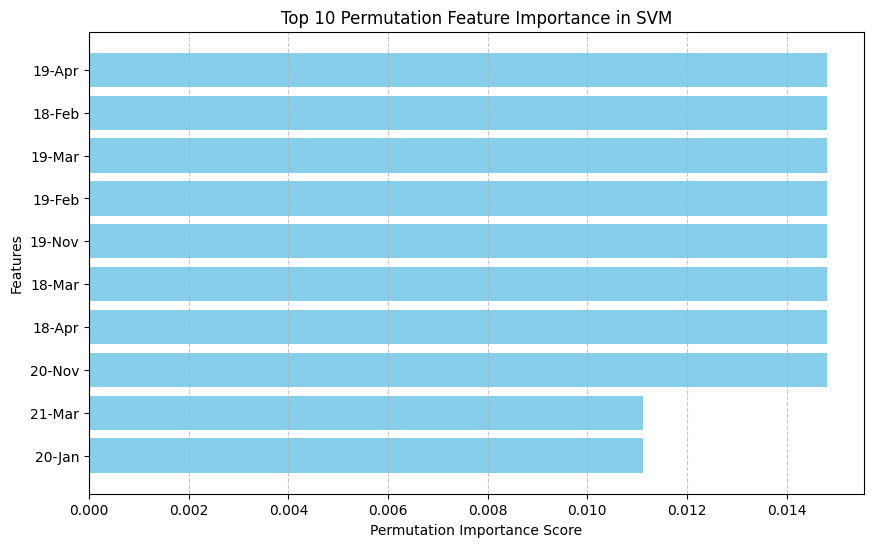

In [123]:
# Plot Top 10 Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx], color="skyblue")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Permutation Feature Importance in SVM")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig('Feature importance.png', format='png', bbox_inches='tight')

plt.show()